<a href="https://colab.research.google.com/github/CastanharoA/Data-Science---Boot---MJV/blob/main/3_Arquivos_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arquivos em Python

Autor: Natanael Moura Junior (natanael.junior@mjv.com.br)

<img align="center" width="200" src="https://raw.githubusercontent.com/natmourajr/data/main/mjv-tecnologia.png?raw=1">



# Objetivos
Fazer uma revisão a respeito de alguns formatos de arquivo em python e apresentar alguns exemplos.

# Arquivos Texto

In [ ]:
# Para um arquivo de texto em python basta fazer
f = open("test.txt")    # open file in current directory

FileNotFoundError: ignored

In [ ]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

Repare que houve um erro. Este erro pode ser explicado pois não existe o arquivo ```test.txt```. E o modo de leitura é muito relevante para abertura dos arquivos

| Mode | Description |
|------|-------------|
| r    | Opens a file for reading. (default) |
| w    | Opens a file for writing. Creates a new file if it does not exist or truncates the file if it exists.|
| x    | Opens a file for exclusive creation. If the file already exists, the operation fails. |
| a    | Opens a file for appending at the end of the file without truncating it. Creates a new file if it does not exist.|
| t    | Opens in text mode. (default) |
| b	   | Opens in binary mode. |
| +    | Opens a file for updating (reading and writing) |

In [ ]:
# vamos um arquivo no modo de escrita
f = open("test.txt", mode='w')
# espera-se que o arquivo seja criado e escrito como vazio

In [ ]:
# abrindo e fechando o arquivo
f = open("test.txt", mode='w', encoding = 'utf-8')
# trabalhar com o arquivo
f.close()

Este método não é totalmente **seguro**. Se ocorrer uma exceção quando estivermos executando alguma operação com o arquivo, o código será encerrado sem fechar o arquivo.

Uma maneira mais segura é usar um bloco 
```python
try
finally
```

In [ ]:
try:
   f = open("test.txt",mode='w', encoding = 'utf-8')
   # perform file operations
finally:
   f.close()

Dessa forma, garantimos que o arquivo será fechado corretamente, mesmo que seja gerada uma exceção que faça com que o fluxo do programa pare.

Podemos tratar uma exceção através de um comando simples

```python
try:
  comandos que serão tentados
except EXCEÇÂO:
  comandos que devem ser feitos se a exceção acontecer
finally:
  comando que devem ser executados no final
```

In [ ]:
try:
    f =open("test.txt")
except IOError:
    print("File not found or path is incorrect")
finally:
    print("exit")

A melhor maneira de fechar um arquivo é usando a instrução ```with```. Isso garante que o arquivo seja fechado quando o bloco dentro da instrução ```with``` for encerrado.

Não precisamos chamar explicitamente o método ```close()```. É feito internamente

In [ ]:
with open("test.txt", encoding = 'utf-8') as f:
   # perform file operations
   print('Dentro do with')

Dentro do with


### Escrevendo um arquivo texto

Para escrever em um arquivo em Python, precisamos abri-lo em modo de escrita (```w```) ou modo de apêndice (```a```), ou modo de criação exclusiva (```x```).

Precisamos ter cuidado com o modo ```w```, pois ele sobrescreverá no arquivo se já existir. Devido a isso, todos os dados anteriores são apagados.

A escrita de uma string ou sequência de bytes (para arquivos binários) é feita usando o método ```write()```. Este método retorna o número de caracteres gravados no arquivo.

In [ ]:
with open("test.txt",'w',encoding = 'utf-8') as f:
   f.write("my first file\n")
   f.write("This file\n")
   f.write("contains three lines\n")

Aqui será criado um novo arquivo chamado ```test.txt``` no diretório atual se ele não existir. Se existir, será sobrescrito.

Devemos incluir os próprios caracteres de nova linha para distinguir as diferentes linhas.

### Lendo arquivos texto

Para ler um arquivo em Python, devemos abrir o arquivo no modo de leitura ```r```.

Existem vários métodos disponíveis para esse fim. Podemos usar o método ```read(size)``` para ler o número de tamanho dos dados. Se o parâmetro de tamanho não for especificado, ele lê e retorna até o final do arquivo.

Podemos ler o arquivo ```text.txt``` que escrevemos na seção acima da seguinte maneira:

In [ ]:
f = open("test.txt",'r',encoding = 'utf-8')
print(f.readline()) # read the first line
print('----------------------')
print(f.read(4))    # read the first 4 data
print('----------------------')
print(f.read(4))    # read the next 4 data
print('----------------------')
print(f.read())     # read in the rest till end of file
print('----------------------')
print(f.read())     # further reading returns empty sting
print('----------------------')

my first file

----------------------
This
----------------------
 fil
----------------------
e
contains three lines

----------------------

----------------------


Podemos ver que o método ```read()``` retorna uma nova linha como ```\ n```. Uma vez que o final do arquivo é alcançado, obtemos uma string vazia em outras leituras.

Podemos mudar nosso cursor de arquivo atual (posição) usando o método ```seek()```. Da mesma forma, o método ```tell()``` retorna nossa posição atual (em número de bytes).

In [ ]:
print('Lemos',f.tell(), 'caracteres do arquivo')    # get the current file position

f.seek(0)   # bring file cursor to initial position
print(f.read())  # read the entire file

Lemos 45 caracteres do arquivo
my first file
This file
contains three lines



Podemos ler um arquivo linha por linha usando um loop for. Isso é eficiente e rápido.

In [ ]:
f.seek(0)
for line in f:
  print(line, end = '')

my first file
This file

contains three lines


Nesta célula, as linhas do próprio arquivo incluem um caractere de nova linha ```\n```. Portanto, usamos o parâmetro final da função ```print()``` para evitar duas novas linhas ao imprimir.

Alternativamente, podemos usar o método ```readline()``` para ler linhas individuais de um arquivo. Este método lê um arquivo até a nova linha, incluindo o caractere de nova linha.

In [ ]:
f.seek(0)
print(f.readline())
print(f.readline())
print(f.readline())

my first file

This file





Por último, o método ```readlines()``` retorna uma lista de linhas restantes de todo o arquivo. Todos esses métodos de leitura retornam valores vazios quando o fim do arquivo (EOF) é atingido.

In [ ]:
f.seek(0)
f.readlines()

['my first file\n', 'This file\n', '\n', 'contains three lines\n']

### Atributos de objeto de arquivo Python
Os atributos de arquivo fornecem informações sobre o arquivo e o estado do arquivo.

| Atributo | Descrição |
|------|-------------|
| name    | Nome do arquivo |
| mode    | Modo de abertura do arquivo|
| encoding | Codificação utilizada para abertura do arquivo |
| closed    | status de abertura do arquivo|

In [ ]:
with open("test.txt") as file:
    print("Name of the file:",file.name)
    print("Mode of the file:",file.mode)
    print("Mode of the file:",file.encoding)
print("Closed?",file.closed)

Name of the file: test.txt
Mode of the file: r
Mode of the file: UTF-8
Closed? True


# Pandas

Nem sempre é fácil trabalhar com diferentes tipos de dados dentro de um código. Assim sendo, alguns cientistas de dados criar uma biblioteca própria para trabalhar com dados de diferentes formatos. A estrutura de organização é bastante simples e consiste em um formato chave valor. Mas cada coluna funciona independentemente. 

<img align="center" width="500" src="https://github.com/natmourajr/data/blob/main/pandas_dataframe.svg?raw=1">


Pandas é muito interessante pois suporta diferentes tipos de dados e pode ser utilizado com diferentes conversores.


<img align="center" width="1000" src="https://github.com/natmourajr/data/blob/main/pandas_readwrite.svg?raw=1">


In [ ]:
import pandas as pd
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

In [ ]:
df.head() # mostra as primeiras ocorrências dentro dos dados contidos no df

Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female

In [ ]:
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

In [ ]:
df.Age

0    22
1    35
2    58
Name: Age, dtype: int64

A parte mais teórica é bem fácil, mas vamos a uma análise mais prática. Vamos trabalhar com uma análise de dados real.

## Exemplo de análise básica: Passageiros do Titanic
Este tutorial usa o conjunto de dados do Titanic, armazenado como CSV. Os dados consistem nas seguintes colunas de dados:


* PassengerId: Id de cada passageiro.
* Sobreviveu: Esta coluna tem valores 0 e 1. 0 para não sobreviveu e 1 para sobreviveu.
* Pclass: Existem 3 classes: Classe 1, Classe 2 e Classe 3.
* Name: Nome do passageiro.
* Sex: gênero do passageiro.
* Age: Idade do passageiro.
* SibSp: Indicação de que o passageiro tem irmãos e cônjuge.
* Parch: se o passageiro está sozinho ou tem família.
* Ticket: Número do bilhete do passageiro.
* Fare: Indicando a tarifa.
* Cabin: A cabine do passageiro.
* Embarked: a categoria embarcada.

Primeiramente, vamos buscar os dados. Os dados encontram-se em um repositório git, criado pelo Natanael Moura Junior (natmourajr) para a disciplina

Agora vamos carregar os dados em um formato mais comodo para manipulação


In [ ]:
import pandas as pd
df_titanic = pd.read_csv("https://raw.githubusercontent.com/natmourajr/data/main/titanic.csv", sep=',', encoding='utf-8')

In [ ]:
df_titanic.head()

PassengerId  Survived  Pclass  ...       Fare Cabin  Embarked
0            1         0       3  ...     7.2500   NaN         S
1            2         1       1  ...    71.2833   C85         C
2            3         1       3  ...  7925.0000   NaN         S
3            4         1       1  ...    53.1000  C123         S
4            5         0       3  ...     8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
df_titanic.shape

(891, 12)

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_titanic.describe().T

count         mean           std  ...    50%       75%       max
PassengerId  891.0   446.000000    257.353842  ...  446.0  668.5000     891.0
Survived     891.0     0.383838      0.486592  ...    0.0    1.0000       1.0
Pclass       891.0     2.308642      0.836071  ...    3.0    3.0000       3.0
Age          714.0    29.699118     14.526497  ...   28.0   38.0000      80.0
SibSp        891.0     0.523008      1.102743  ...    0.0    1.0000       8.0
Parch        891.0     0.381594      0.806057  ...    0.0    0.0000       6.0
Fare         891.0  4026.270117  22153.876204  ...   19.5   56.9292  262375.0

[7 rows x 8 columns]

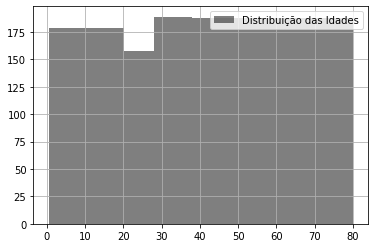

In [ ]:
import matplotlib.pyplot as plt
ages = df_titanic[df_titanic["Age"].notna()]['Age']
#bins = np.linspace(ages.min(),ages.max(), 20)
#np.delete(bins,17)

bins  = [ages.min(),
         ages.quantile(q=0.25),
         ages.quantile(q=0.50),
         ages.quantile(q=0.75),
         ages.max()]

count, bins, patches = plt.hist(df_titanic[df_titanic["Age"].notna()]['Age'], bins=bins, 
         color='black', alpha=0.5, label='Distribuição das Idades');
plt.legend(loc='best')
plt.grid()

In [ ]:
df_titanic['Age'].quantile(q=0.24) # fazer um quantil (not 25%)

38.0

In [ ]:
ages = df_titanic[df_titanic["Age"].notna()]['Age']
bins = np.linspace(ages.min(),ages.max(), 20)
print(bins)

[ 0.42        4.60842105  8.79684211 12.98526316 17.17368421 21.36210526
 25.55052632 29.73894737 33.92736842 38.11578947 42.30421053 46.49263158
 50.68105263 54.86947368 59.05789474 63.24631579 67.43473684 71.62315789
 75.81157895 80.        ]


In [ ]:
np.delete(bins,17)

array([ 0.42      ,  4.60842105,  8.79684211, 12.98526316, 17.17368421,
       21.36210526, 25.55052632, 29.73894737, 33.92736842, 38.11578947,
       42.30421053, 46.49263158, 50.68105263, 54.86947368, 59.05789474,
       63.24631579, 67.43473684, 75.81157895, 80.        ])

In [ ]:
bins = list(bins)


In [ ]:
import numpy as np
print(count)
print(bins)
print(np.sum(count))

[40. 14. 15. 31. 79. 98. 85. 84. 73. 45. 35. 35. 29. 16. 13. 11.  4.  5.
  1.  1.]
[ 0.42   4.399  8.378 12.357 16.336 20.315 24.294 28.273 32.252 36.231
 40.21  44.189 48.168 52.147 56.126 60.105 64.084 68.063 72.042 76.021
 80.   ]
714.0


In [ ]:
print(bins[0:5]) # quero pegar os eventos de 0.42 (min) até o 20.1 (primeiro quartil)
print(np.sum(count)) # somatório total
print(np.sum(count[0:5])) # somatório de interesse
print(np.sum(count[0:5]/np.sum(count))) # percentual do primeiro quartil

[ 0.42   4.399  8.378 12.357 16.336]
714.0
179.0
0.2507002801120448


In [ ]:
print(bins[5:7])

[20.315 24.294]


In [ ]:
n = 5 + np.random.randn(10000000)
df_exp = pd.DataFrame(n,columns=['Variavel_aleatoria'])
df_exp.head()

Variavel_aleatoria
0            3.801414
1            5.112591
2            5.453126
3            6.039829
4            6.563221

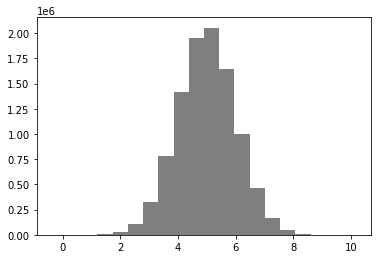

In [ ]:
import matplotlib.pyplot as plt

count, bins, patches = plt.hist(df_exp['Variavel_aleatoria'], bins=20, 
         color='black', alpha=0.5, label='Distribuição da variável aleatória');

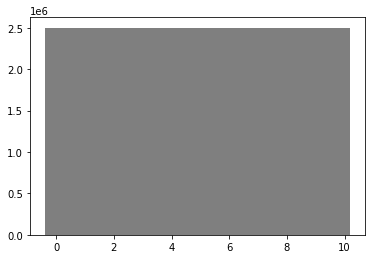

In [ ]:
import matplotlib.pyplot as plt

bins  = [df_exp['Variavel_aleatoria'].min(),
         df_exp['Variavel_aleatoria'].quantile(q=0.25),
         df_exp['Variavel_aleatoria'].quantile(q=0.50),
         df_exp['Variavel_aleatoria'].quantile(q=0.75),
         df_exp['Variavel_aleatoria'].max()]
count, bins, patches = plt.hist(df_exp['Variavel_aleatoria'], bins=bins, 
         color='black', alpha=0.5, label='Distribuição da variável aleatória');

In [ ]:
# objetivo: definir a binagem de um histograma com os percentis de uma variavel
bins = list()
bins.append(df_exp['Variavel_aleatoria'].min())

for idx in range(0,100,1):
  bins.append(df_exp['Variavel_aleatoria'].quantile(q=idx/100))
bins.append(df_exp['Variavel_aleatoria'].max())


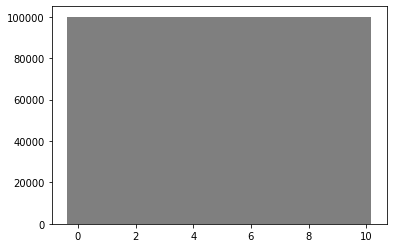

In [ ]:
count, bins, patches = plt.hist(df_exp['Variavel_aleatoria'], bins=bins, 
         color='black', alpha=0.5, label='Distribuição da variável aleatória');
#plt.legend(loc='best');

In [ ]:
# objetivo: criar uma variável aleatória que não seja gaussiana
n = np.random.exponential(scale=1.0, size=10000000)
df_exp['Variavel_aleatoria2'] = n
df_exp.head()

Variavel_aleatoria  Variavel_aleatoria2
0            3.801414             0.651701
1            5.112591             2.455898
2            5.453126             0.428373
3            6.039829             0.734642
4            6.563221             5.180694

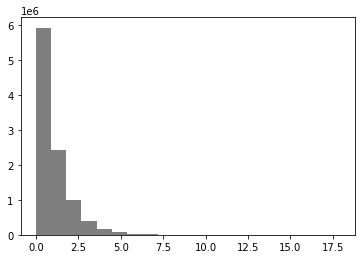

In [ ]:
plt.hist(df_exp['Variavel_aleatoria2'], bins=20, 
         color='black', alpha=0.5, label='Distribuição da variável aleatória');
        

In [ ]:
print(df_exp.min())
print()
print(df_exp.min().min())# minimo dos minimos
print(df_exp.max().max()) # máximo dos máximos

Variavel_aleatoria    -3.738663e-01
Variavel_aleatoria2    8.006980e-08
dtype: float64

-0.37386625528855877
17.930500815057563


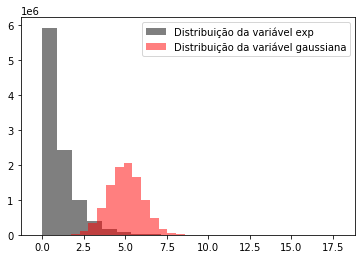

In [ ]:
plt.hist(df_exp['Variavel_aleatoria2'], bins=20, 
         color='black', alpha=0.5, label='Distribuição da variável exp');
plt.hist(df_exp['Variavel_aleatoria'], bins=20, 
         color='red', alpha=0.5, label='Distribuição da variável gaussiana');
plt.legend(loc='best');

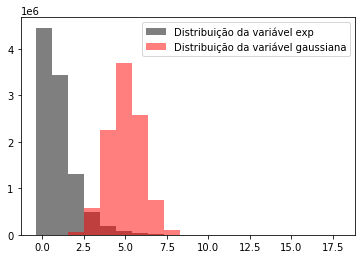

In [ ]:
my_bins = np.linspace(df_exp.min().min(), df_exp.max().max(),20)
plt.hist(df_exp['Variavel_aleatoria2'], bins=my_bins, 
         color='black', alpha=0.5, label='Distribuição da variável exp');
plt.hist(df_exp['Variavel_aleatoria'], bins=my_bins, 
         color='red', alpha=0.5, label='Distribuição da variável gaussiana');
plt.legend(loc='best');

Repare que as variáveis que estão sendo descritas acima são as variáveis numéricas.

Eu criei uma função personalizada para todos os tipos de variáveis



In [ ]:
import pandas as pd
import numpy as np


def numeric_summary(df, columns):
  summ_dict = {
      "data type": df[columns].dtypes.values,
      '# not NaN': df[columns].count().values,
      '# NaN': df[columns].shape[0]-df[columns].count().values,
      '% NaN': np.round(100*((df[columns].shape[0]-df[columns].count().values)/df[columns].shape[0]),2),
      '# !=0': df[columns].astype(bool).sum(axis=0),
      '% populado': np.round(df[columns].count().values/df.shape[0],2),      
  }
  df_summ_dict = pd.DataFrame(summ_dict, index=df[columns].columns)
  return df_summ_dict

In [ ]:
numeric_summary(df_titanic, df_titanic.columns.values)

data type  # not NaN  # NaN  % NaN  # !=0  % populado
PassengerId     int64        891      0   0.00    891        1.00
Survived        int64        891      0   0.00    342        1.00
Pclass          int64        891      0   0.00    891        1.00
Name           object        891      0   0.00    891        1.00
Sex            object        891      0   0.00    891        1.00
Age           float64        714    177  19.87    891        0.80
SibSp           int64        891      0   0.00    283        1.00
Parch           int64        891      0   0.00    213        1.00
Ticket         object        891      0   0.00    891        1.00
Fare          float64        891      0   0.00    876        1.00
Cabin          object        204    687  77.10    891        0.23
Embarked       object        889      2   0.22    891        1.00

In [ ]:
ages = df_titanic["Age"]
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
df_titanic["Age"].shape

(891,)

In [ ]:
age_sex = df_titanic[["Age", "Sex"]]
age_sex.shape

(891, 2)

In [ ]:
age_sex.head()

Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male

In [ ]:
age_sex[age_sex['Sex']=='male']['Age'].mean()

30.72664459161148

In [ ]:
age_sex[age_sex['Sex']=='female']['Age'].mean()

27.915708812260537

In [ ]:
above_35 = df_titanic[df_titanic["Age"] > 35]
above_35.head()

PassengerId  Survived  Pclass  ...        Fare Cabin  Embarked
1             2         1       1  ...     71.2833   C85         C
6             7         0       1  ...     51.8625   E46         S
11           12         1       1  ...     26.5500  C103         S
13           14         0       3  ...  31275.0000   NaN         S
15           16         1       2  ...     16.0000   NaN         S

[5 rows x 12 columns]

In [ ]:
df_titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

Repare que a saída da expressão condicional (>, mas também ==,! =, <, <=, ... funcionaria) é na verdade uma série pandas de valores booleanos (verdadeiro ou falso) com o mesmo número de linhas do DataFrame original. Essa série de valores booleanos pode ser usada para filtrar o DataFrame, colocando-o entre os colchetes de seleção ```[]```. Apenas as linhas para as quais o valor é True serão selecionadas.

Já sabemos que o DataFrame original consiste em 891 linhas. Vamos dar uma olhada no número de linhas que satisfazem a condição, verificando o atributo de forma do DataFrame resultante acima de_35:

In [ ]:
above_35.shape

(217, 12)

Ou seja, se quisermos saber quantos % dos passageiros tem acima de 35 anos podemos fazer:

In [ ]:
perc = 100.*(above_35.shape[0]/df_titanic.shape[0])
print(perc)

24.354657687991022


Vamos encontrar os passageiros das Classes 2 e 3

In [ ]:
class_23 = df_titanic[df_titanic["Pclass"].isin([2, 3])]
class_23.shape

(675, 12)

Semelhante à expressão condicional, a função condicional ```isin()``` retorna um ```True``` para cada linha em que os valores estão na lista fornecida. Para filtrar as linhas com base em tal função, use a função condicional dentro dos colchetes de seleção ```[]```. Nesse caso, a condição dentro dos colchetes de seleção titanic ```["Pclass"]```. ```isin([2, 3])``` verifica quais linhas a coluna Pclass é 2 ou 3.

O acima é equivalente a filtrar por linhas para as quais a classe é 2 ou 3 e combinar as duas instruções com um | (ou) operador:

In [ ]:
class_23 = df_titanic[(df_titanic["Pclass"] == 2) | (df_titanic["Pclass"] == 3)]
class_23.shape

(675, 12)

Para dados que não foram preenchidos (o que é bastante comum na vida real), a biblioteca Pandas interpreta como  ```NaN``` ou ```na``` (not a number). Vamos filtrar os eventos de idade iguais a ```NaN```

In [ ]:
age_no_na = df_titanic[df_titanic["Age"].notna()]
print(age_no_na.shape)
age_no_na.head()

(714, 12)


PassengerId  Survived  Pclass  ...       Fare Cabin  Embarked
0            1         0       3  ...     7.2500   NaN         S
1            2         1       1  ...    71.2833   C85         C
2            3         1       3  ...  7925.0000   NaN         S
3            4         1       1  ...    53.1000  C123         S
4            5         0       3  ...     8.0500   NaN         S

[5 rows x 12 columns]

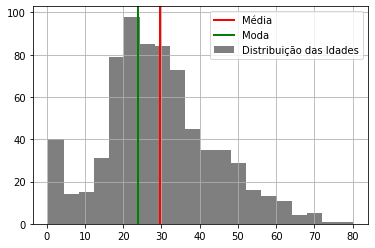

In [ ]:
# preencher o df com informações referentes a idade pela média da distribuição

import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_titanic[df_titanic["Age"].notna()]['Age'], bins=20, 
         color='black', alpha=0.5, label='Distribuição das Idades');
plt.grid()
plt.axvline(x=df_titanic[df_titanic["Age"].notna()]['Age'].mean(), 
            color='red', linewidth=2, label='Média')
plt.axvline(x=df_titanic[df_titanic["Age"].notna()]['Age'].mode().values[0], 
            color='green', linewidth=2, label='Moda')
plt.legend(loc='best');

In [ ]:
df_titanic[df_titanic["Age"].notna()]['Age'].mean()

29.69911764705882

In [ ]:
df_titanic[df_titanic["Age"].notna()]['Age'].mode()

0    24.0
dtype: float64

In [ ]:
df_titanic[df_titanic["Age"].notna()]['Age'].mode().values[0]

24.0

In [ ]:
# o código a seguir vai dar erro!!!
df_titanic[df_titanic["Age"].isna()]['Age'] = df_titanic[df_titanic["Age"].notna()]['Age'].mean()
# escrever em um subset sem utilizar o loc pode dar problema!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_titanic.loc[df_titanic["Age"].isna(), "Age"] = df_titanic[df_titanic["Age"].notna()]['Age'].mean()

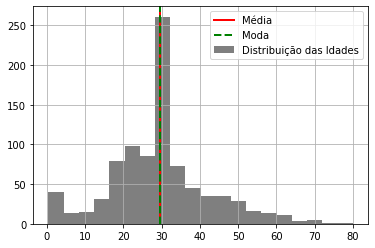

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_titanic[df_titanic["Age"].notna()]['Age'], bins=20, 
         color='black', alpha=0.5, label='Distribuição das Idades');
plt.grid()
plt.axvline(x=df_titanic[df_titanic["Age"].notna()]['Age'].mean(),
            color='red', linewidth=2, label='Média')
plt.axvline(x=df_titanic[df_titanic["Age"].notna()]['Age'].mode().values[0], linestyle='--',
            color='green', linewidth=2, label='Moda')
plt.legend(loc='best');

A função condicional ```notna()``` retorna True para cada linha em que os valores não são nulos. Como tal, isso pode ser combinado com os colchetes de seleção ```[]``` para filtrar a tabela de dados.

In [ ]:
adult_names = df_titanic.loc[df_titanic["Age"] > 18, "Name"]
adult_names.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Neste caso, um subconjunto de linhas e colunas é feito de uma vez e usar apenas os colchetes de seleção ```[]``` não é mais suficiente. Os operadores ```loc```/```iloc``` são necessários na frente dos colchetes de seleção ```[]```. Ao usar ```loc```/```iloc```, a parte antes da vírgula são as linhas que você deseja e a parte depois da vírgula são as colunas que você deseja selecionar.

Ao usar os nomes das colunas, rótulos de linha ou uma expressão de condição, use o operador loc na frente dos colchetes de seleção ```[]```. Para a parte antes e depois da vírgula, você pode usar um único rótulo, uma lista de rótulos, uma fatia de rótulos, uma expressão condicional ou dois pontos. Usar dois pontos especifica que você deseja selecionar todas as linhas ou colunas.

Agora vamos para uma seleção mais específica. Estou interessado nas linhas 10 a 25 e nas colunas 3 a 5.

In [ ]:
df_titanic.iloc[9:25, 2:5]

Pclass                                               Name     Sex
9        2                Nasser, Mrs. Nicholas (Adele Achem)  female
10       3                    Sandstrom, Miss. Marguerite Rut  female
11       1                           Bonnell, Miss. Elizabeth  female
12       3                     Saundercock, Mr. William Henry    male
13       3                        Andersson, Mr. Anders Johan    male
14       3               Vestrom, Miss. Hulda Amanda Adolfina  female
15       2                   Hewlett, Mrs. (Mary D Kingcome)   female
16       3                               Rice, Master. Eugene    male
17       2                       Williams, Mr. Charles Eugene    male
18       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female
19       3                            Masselmani, Mrs. Fatima  female
20       2                               Fynney, Mr. Joseph J    male
21       2                              Beesley, Mr. Lawrence    male
22       3                        McGowan, Miss. Anna "Annie"  female
23       1                       Sloper, Mr. William Thompson    male
24       3                      Palsson, Miss. Torborg Danira  female

Novamente, um subconjunto de linhas e colunas é feito de uma vez e apenas usar colchetes de seleção ```[]``` não é mais suficiente. Quando estiver especificamente interessado em certas linhas e/ou colunas com base em sua posição na tabela, use o operador iloc na frente dos colchetes de seleção ```[]```.


Ao selecionar linhas e/ou colunas específicas com ```loc``` ou ```iloc```, novos valores podem ser atribuídos aos dados selecionados. Por exemplo, para atribuir o nome anônimo aos 3 primeiros elementos da terceira coluna:


In [ ]:
df_titanic.iloc[0:3, 3] = "anonymous"
df_titanic.head()

PassengerId  Survived  Pclass  ...       Fare Cabin  Embarked
0            1         0       3  ...     7.2500   NaN         S
1            2         1       1  ...    71.2833   C85         C
2            3         1       3  ...  7925.0000   NaN         S
3            4         1       1  ...    53.1000  C123         S
4            5         0       3  ...     8.0500   NaN         S

[5 rows x 12 columns]

Para simplificar um pouco as coisas, vamos tentar colocar uma figura para lembrarmos

<img align="center" width="1000" src="https://github.com/natmourajr/data/blob/main/pandas_iloc_vs_loc.png?raw=1">


## Exemplo de plotagem com pandas

Para este tutorial, são usados ​​dados de qualidade do ar, disponibilizados pela openaq e usando o pacote py-openaq. O conjunto de dados air_quality_no2.csv fornece valores para as estações de medição FR04014, BETR801 e London Westminster em Paris, Antuérpia e Londres, respectivamente.

In [ ]:
import pandas as pd
df_titanic = pd.read_csv("https://raw.githubusercontent.com/natmourajr/data/main/titanic.csv",
                         sep=',', index_col=0, encoding='utf-8')

In [ ]:
df_titanic.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_air = pd.read_csv("https://raw.githubusercontent.com/natmourajr/data/main/air_quality_no2.csv", 
                    sep=',', encoding='utf-8', index_col=0, parse_dates=True)

In [ ]:
df_air.head(10)

station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN
2019-05-07 07:00:00              NaN           72.4            26.0
2019-05-07 08:00:00              NaN           77.7            32.0
2019-05-07 09:00:00              NaN           67.9            32.0
2019-05-07 10:00:00              NaN           56.0            28.0
2019-05-07 11:00:00              NaN           34.5            21.0

In [ ]:
df_air.tail() # mostra os 5 ultimos valores do banco

station_antwerp  station_paris  station_london
datetime                                                           
2019-06-20 22:00:00              NaN           21.4             NaN
2019-06-20 23:00:00              NaN           24.9             NaN
2019-06-21 00:00:00              NaN           26.5             NaN
2019-06-21 01:00:00              NaN           21.8             NaN
2019-06-21 02:00:00              NaN           20.0             NaN

In [ ]:
df_air.shape

(1035, 3)

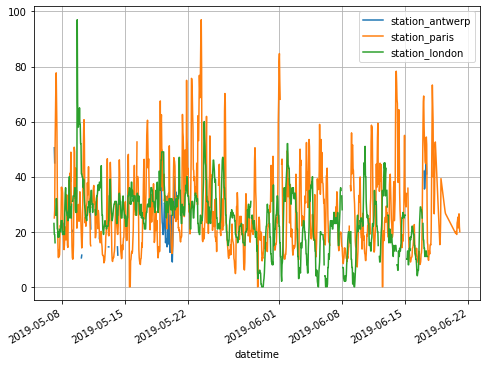

In [ ]:
df_air.plot(figsize=(8,6))
plt.grid()

In [ ]:
df_air['station_antwerp'].values

array([ nan, 50.5, 45. , ...,  nan,  nan,  nan])

In [ ]:
for coluna in df_air.columns:
  print(coluna)

station_antwerp
station_paris
station_london


In [ ]:
df_air.head()

station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN

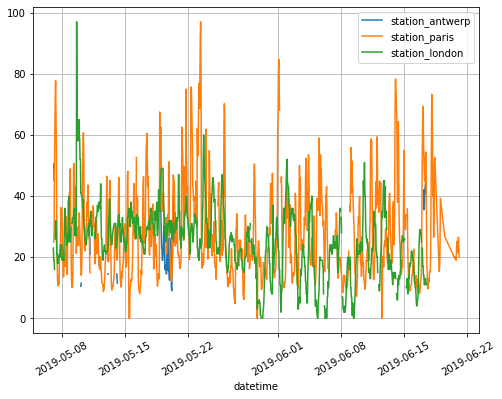

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6)) # esse código cria uma figura com tamanho 8 por 6
ax = fig.add_subplot(111) # crio um subeixo de trabalho

for coluna in df_air.columns:
  x = df_air.index
  y = df_air[coluna].values
  ax.plot(x, y, label=coluna)
ax.grid()
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 30) # peguei as lables do eixo x e rotacionei em 30 graus!
ax.legend(loc='best')
ax.set_xlabel('datetime');

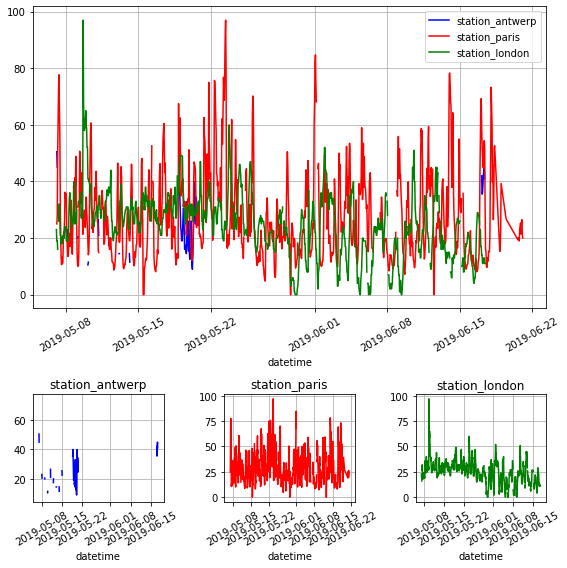

In [ ]:
import matplotlib.pyplot as plt

# criar um grafico grande com todos os plots em uma linha,
# e 3 gráficos menores com um plot cada na outra

fig = plt.figure(figsize=(8,8)) # esse código cria uma figura com tamanho 8 por 8

# crio a estrutura de plotagem
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0))
ax3 = plt.subplot2grid((3, 3), (2, 1))
ax4 = plt.subplot2grid((3, 3), (2, 2))

cores = ['blue','red','green']
id = 0
for coluna in df_air.columns:
  x = df_air.index
  y = df_air[coluna].values
  ax1.plot(x, y, label=coluna, color=cores[id])
  id += 1
ax1.grid()
plt.setp( ax1.xaxis.get_majorticklabels(), rotation= 30) # peguei as lables do eixo x e rotacionei em 30 graus!
ax1.legend(loc='best')
ax1.set_xlabel('datetime');

# para o ax2
x = df_air.index
y = df_air[df_air.columns[0]].values
ax2.plot(x, y, label=coluna, color=cores[0])
ax2.grid()
plt.setp( ax2.xaxis.get_majorticklabels(), rotation= 30) # peguei as lables do eixo x e rotacionei em 30 graus!
ax2.set_xlabel('datetime');
ax2.set_title(df_air.columns[0])

# para o ax3
x = df_air.index
y = df_air[df_air.columns[1]].values
ax3.plot(x, y, label=coluna, color=cores[1])
ax3.grid()
plt.setp( ax3.xaxis.get_majorticklabels(), rotation= 30) # peguei as lables do eixo x e rotacionei em 30 graus!
ax3.set_xlabel('datetime');
ax3.set_title(df_air.columns[1])


# para o ax4
x = df_air.index
y = df_air[df_air.columns[2]].values
ax4.plot(x, y, label=coluna, color=cores[2])
ax4.grid()
plt.setp( ax4.xaxis.get_majorticklabels(), rotation= 30) # peguei as lables do eixo x e rotacionei em 30 graus!
ax4.set_xlabel('datetime');
ax4.set_title(df_air.columns[2])

plt.tight_layout()

In [ ]:
print(list(ax.xaxis.get_majorticklabels()))

[Text(737187.0, 0, '2019-05-08'), Text(737194.0, 0, '2019-05-15'), Text(737201.0, 0, '2019-05-22'), Text(737211.0, 0, '2019-06-01'), Text(737218.0, 0, '2019-06-08'), Text(737225.0, 0, '2019-06-15'), Text(737232.0, 0, '2019-06-22')]


In [ ]:
df_air.index

DatetimeIndex(['2019-05-07 02:00:00', '2019-05-07 03:00:00',
               '2019-05-07 04:00:00', '2019-05-07 05:00:00',
               '2019-05-07 06:00:00', '2019-05-07 07:00:00',
               '2019-05-07 08:00:00', '2019-05-07 09:00:00',
               '2019-05-07 10:00:00', '2019-05-07 11:00:00',
               ...
               '2019-06-20 17:00:00', '2019-06-20 18:00:00',
               '2019-06-20 19:00:00', '2019-06-20 20:00:00',
               '2019-06-20 21:00:00', '2019-06-20 22:00:00',
               '2019-06-20 23:00:00', '2019-06-21 00:00:00',
               '2019-06-21 01:00:00', '2019-06-21 02:00:00'],
              dtype='datetime64[ns]', name='datetime', length=1035, freq=None)

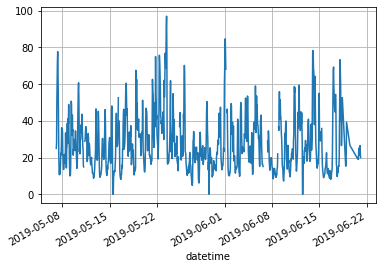

In [ ]:
df_air["station_paris"].plot()
plt.grid()

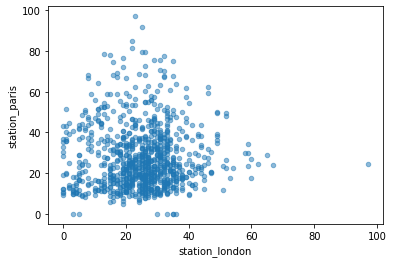

In [ ]:
df_air.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

Um scatter plot traz a informação da relação linear entre duas variáveis. Uma relação linear pressupõe um modelo do tipo $y = ax+b$, onde o $a$ é chamado de coeficiente angular e o $b$ é chamado de coeficiente linear.

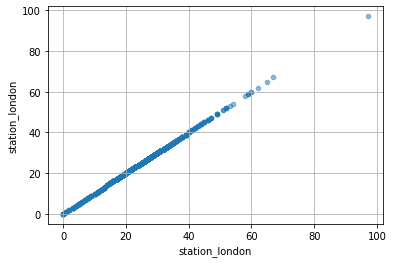

In [ ]:
df_air.plot.scatter(x="station_london", y="station_london", alpha=0.5)
plt.grid()

No gráfico acima, temos (visualmente) que o coeficiente angular é igual a 1 e o coeficiente linear é igual a zero. Como eu faria para estimar os coeficientes sem ser visualmente? Fazer um ajuste de modelo linear entre as variáveis em questão!

Como vamos fazer? Ajuste de modelos é parecido com um jogo de criança, onde temos as formas geométricas e tentaremos encontrar a melhor forma para o melhor encaixe.

In [ ]:
from sklearn.linear_model import LinearRegression
y = df_air[df_air['station_london'].notna()]['station_london'].values
x = df_air[df_air['station_london'].notna()]['station_london'].values

#ajustar o dado para que ele possa ser trabalhado
x = x.reshape((-1,1))
y = y.reshape((-1,1))

# criar um modelo
model = LinearRegression()
# ajustar o modelo criado
model.fit(x,y)
print("Coeficiente angular estimado: ",model.coef_[0][0])
print("Coeficiente linear estimado: ",model.intercept_[0])

Coeficiente angular estimado:  1.0000000000000002
Coeficiente linear estimado:  -7.105427357601002e-15


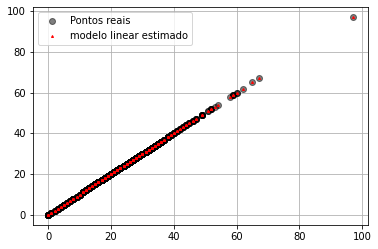

In [ ]:
# vamos desenhar o resultado de uma projeção dos dados no modelo junto aos dados
plt.plot(x, y, 'o', color='black', alpha=0.5,label='Pontos reais'); # = plt.plot(x, y, 'ko', alpha=0.5);
plt.grid()
coef_angular = model.coef_[0][0]
coef_linear = model.intercept_[0]
reta = coef_angular*x+coef_linear
plt.plot(x,reta,'^',color='red',markersize=2, label='modelo linear estimado')
plt.legend(loc='best')

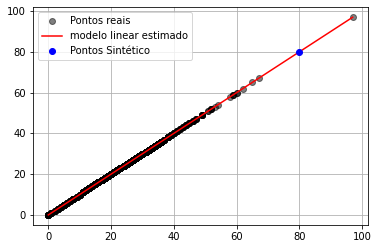

In [ ]:
# vamos desenhar o modelo junto aos dados
plt.plot(x, y, 'o', color='black', alpha=0.5,label='Pontos reais'); # = plt.plot(x, y, 'ko', alpha=0.5);
plt.grid()
coef_angular = model.coef_[0][0]
coef_linear = model.intercept_[0]
pontos = np.linspace(min(x), max(x), 100)
reta = coef_angular*pontos+coef_linear
plt.plot(pontos,reta,'-',color='red', label='modelo linear estimado')
# vou criar um dado sintético!
x_novo = 80.0
y_novo = coef_angular*x_novo+coef_linear
plt.plot(x_novo, y_novo, 'o', color='blue',label='Ponto Sintético');
plt.legend(loc='best')

Como sabemos que o modelo linear ajusta corretamente uma reta que descreve o comportamento de y em função de x, podemos criar novos y a partir de x sintéticos.

In [ ]:
print('Coeficiente de determinação do ajuste: ',model.score(x,y))

Coeficiente de determinação do ajuste:  1.0


Vamos tentar criar um modelo linear ($y=ax+b$) que vai tentar estimar o valor da qualidade do ar em Londres ($y$) a partir da qualidade do ar em Paris ($x$)

In [ ]:
df_air[['station_london','station_paris']].dropna().values[:,1].shape

(938,)

In [ ]:
from sklearn.linear_model import LinearRegression
y = df_air[['station_london','station_paris']].dropna().values[:,0]
x = df_air[['station_london','station_paris']].dropna().values[:,1]

#ajustar o dado para que ele possa ser trabalhado
x = x.reshape((-1,1))
y = y.reshape((-1,1))

# criar um modelo
model = LinearRegression()
# ajustar o modelo criado
model.fit(x,y)
print("Coeficiente angular estimado: ",model.coef_[0][0])
print("Coeficiente linear estimado: ",model.intercept_[0])

Coeficiente angular estimado:  0.01160979359009917
Coeficiente linear estimado:  24.56588213250031


In [ ]:
print('Coeficiente de determinação do ajuste: ',model.score(x,y))

Coeficiente de determinação do ajuste:  0.00024591137966123444


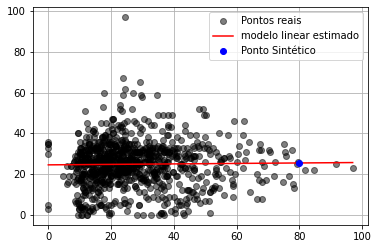

In [ ]:
# vamos desenhar o modelo junto aos dados
plt.plot(x, y, 'o', color='black', alpha=0.5,label='Pontos reais'); # = plt.plot(x, y, 'ko', alpha=0.5);
plt.grid()
coef_angular = model.coef_[0][0]
coef_linear = model.intercept_[0]
pontos = np.linspace(min(x), max(x), 100)
reta = coef_angular*pontos+coef_linear
plt.plot(pontos,reta,'-',color='red', label='modelo linear estimado')
# vou criar um dado sintético!
x_novo = 80.0
y_novo = coef_angular*x_novo+coef_linear
plt.plot(x_novo, y_novo, 'o', color='blue',label='Ponto Sintético');
plt.legend(loc='best')

Além do gráfico de linha padrão ao usar a função de gráfico, várias alternativas estão disponíveis para plotar os dados. Vamos usar algum Python padrão para obter uma visão geral dos métodos de plot disponíveis:

In [ ]:
[
    method_name
    for method_name in dir(df_air.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


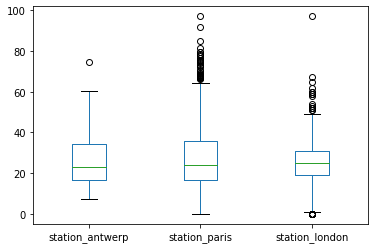

In [ ]:
df_air.plot.box()

Este gráfico é muito famoso em análise de dados pois demonstra alguns parâmetros interessantes a respeito da distribuição de dados. A definição destes parâmetros pode ser vista na figura abaixo.

<img align="center" width="1000" src="https://github.com/natmourajr/data/blob/main/box_plot_def.png?raw=1">


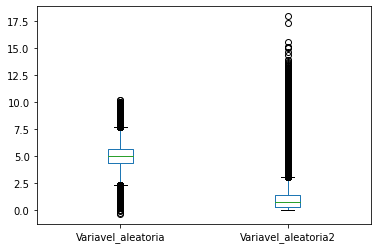

In [ ]:
df_exp.plot.box()

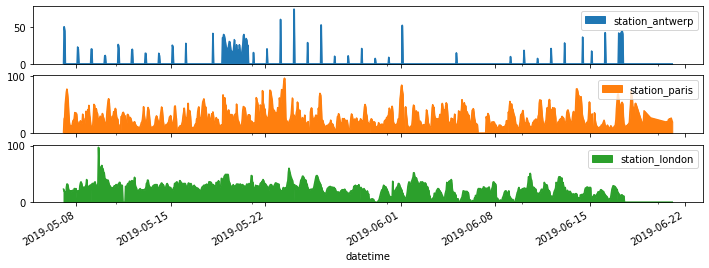

In [ ]:
axs = df_air.plot.area(figsize=(12, 4), subplots=True)

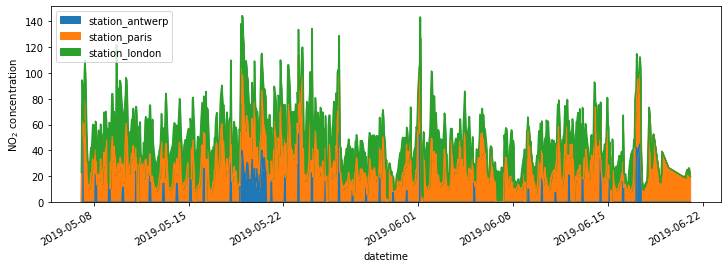

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
df_air.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration");

Podemos também manipular cada uma das colunas do banco de dados através de funções.

In [ ]:
import numpy as np
def somar_duas_colunas(Col1, Col2):
  return Col1+Col2

df_air['Sum_Paris_Antwerp'] = df_air.apply(lambda x: somar_duas_colunas(x['station_antwerp'], x['station_paris']), axis=1)
df_air.head()

In [ ]:
import numpy as np
def somar_duas_colunas(Col1, Col2):
  nCol1 = 0
  nCol2 = 0
  if Col1 is not np.nan:
    nCol1 = Col1
  if Col2 is not np.nan:
    nCol2 = Col2 
  return Col1+Col2

df_air['Sum_Paris_Antwerp'] = df_air.apply(lambda x: somar_duas_colunas(x['station_antwerp'], x['station_paris']), axis=1)
df_air.head()

station_antwerp  ...  Sum_Paris_Antwerp
datetime                              ...                   
2019-05-07 02:00:00              NaN  ...                NaN
2019-05-07 03:00:00             50.5  ...               75.5
2019-05-07 04:00:00             45.0  ...               72.7
2019-05-07 05:00:00              NaN  ...                NaN
2019-05-07 06:00:00              NaN  ...                NaN

[5 rows x 4 columns]

## Exemplo de uma análise de dados: FIFA

Os conjuntos de dados fornecidos incluem os dados dos jogadores para o Modo Carreira do FIFA 15 ao FIFA 21 ("players_i.csv"), onde i pode variar do 15 ao 21. Os dados permitem múltiplas comparações dos mesmos jogadores nas últimas 7 versões do videogame.

### Algumas idéias de análises possíveis:

Comparação histórica entre Messi e Ronaldo (quais atributos de habilidade mudaram mais durante o tempo - em comparação com estatísticas da vida real);

Orçamento ideal para criar uma equipe competitiva (ao nível das top-n equipes da Europa) e em que ponto o orçamento não permite comprar jogadores significativamente melhores para a escalação ideal de um time. Um ponto extra é a mesma comparação com o atributo Potencial para a escalação em vez do atributo Geral;

Análise de amostra dos n principais jogadores (por exemplo, 5% principais jogadores do jogo) para ver se alguns atributos importantes como Agilidade, Controle de Bola ou Força são populares ou não nas versões FIFA. Um exemplo seria ver que os 5% principais jogadores do FIFA 20 são mais rápidos (maior aceleração e agilidade) em comparação com o FIFA 15. A tendência dos atributos também é uma indicação importante de como alguns atributos são necessários para os jogadores vencerem os jogos (a versão com mais 5% dos melhores jogadores com estatísticas de controle de bola altas indicaria que o jogo está mais focado na técnica do que no aspecto físico).

Sinta-se à vontade para usar o conjunto de dados disponível da maneira que preferir e não hesite em sinalizar arquivos adicionais (imagens do jogador - conjuntos de dados anteriores ao FIFA 15) que podem ser implementados nos arquivos CSV existentes.

### Conteúdo
*   Todos os jogadores disponíveis no FIFA 15, 16, 17, 18, 19, 20 e também no FIFA 21
*   Mais de 100 atributos por jogador (atributos do jogador com estatísticas como Ataque, Habilidades, Defesa, Mentalidade, Habilidades GK, etc).
* Página (URL) dos jogadores obtidos
* Posições dos jogadores, com atuação no clube e na seleção nacional.
* Dados pessoais do jogador como nacionalidade, clube, data de nascimento, ganhos (wage), salário (salary) e prêmios obtidos

Os dados foram extraídos do site público [SoFifa](https://sofifa.com).

As posições do jogo são divididas como:

<img align="center" width="1000" src="https://github.com/natmourajr/data/blob/main/fifa_pos.jpg?raw=1">

In [ ]:
# Carga de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_fifa =  pd.read_csv('https://raw.githubusercontent.com/natmourajr/data/main/players_21.csv')

In [ ]:
df_fifa.head()

sofifa_id                                         player_url  ...   rcb    rb
0     158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+3  62+3
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  54+3  61+3
2     200389  https://sofifa.com/player/200389/jan-oblak/210002  ...  33+3  32+3
3     188545  https://sofifa.com/player/188545/robert-lewand...  ...  60+3  61+3
4     190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  49+3  62+3

[5 rows x 106 columns]

In [ ]:
import pandas as pd
import numpy as np

def numeric_summary(df, columns):
  summ_dict = {
      "type": df[columns].dtypes.values,
      '#not NaN': df[columns].count().values,
      '#NaN': df[columns].shape[0]-df[columns].count().values,
      '%NaN': np.round(100*((df[columns].shape[0]-df[columns].count().values)/df[columns].shape[0]),2),
      '#!=0': df[columns].astype(bool).sum(axis=0),
      '%populado': np.round(df[columns].count().values/df.shape[0],2),      
  }
  df_summ_dict = pd.DataFrame(summ_dict, index=df[columns].columns)
  return df_summ_dict

In [ ]:
numeric_summary(df_fifa, df_fifa.columns.values)

type  #not NaN  #NaN  %NaN   #!=0  %populado
sofifa_id    int64     18944     0   0.0  18944        1.0
player_url  object     18944     0   0.0  18944        1.0
short_name  object     18944     0   0.0  18944        1.0
long_name   object     18944     0   0.0  18944        1.0
age          int64     18944     0   0.0  18944        1.0
...            ...       ...   ...   ...    ...        ...
lb          object     18944     0   0.0  18944        1.0
lcb         object     18944     0   0.0  18944        1.0
cb          object     18944     0   0.0  18944        1.0
rcb         object     18944     0   0.0  18944        1.0
rb          object     18944     0   0.0  18944        1.0

[106 rows x 6 columns]

In [ ]:
to_impute_by_mean = df_fifa.loc[:, ['dribbling','defending','passing','pace','shooting','physic']]
# replacing the missing values with mean
for i in to_impute_by_mean.columns:
    df_fifa[i].fillna(df_fifa[i].mean(), inplace = True)

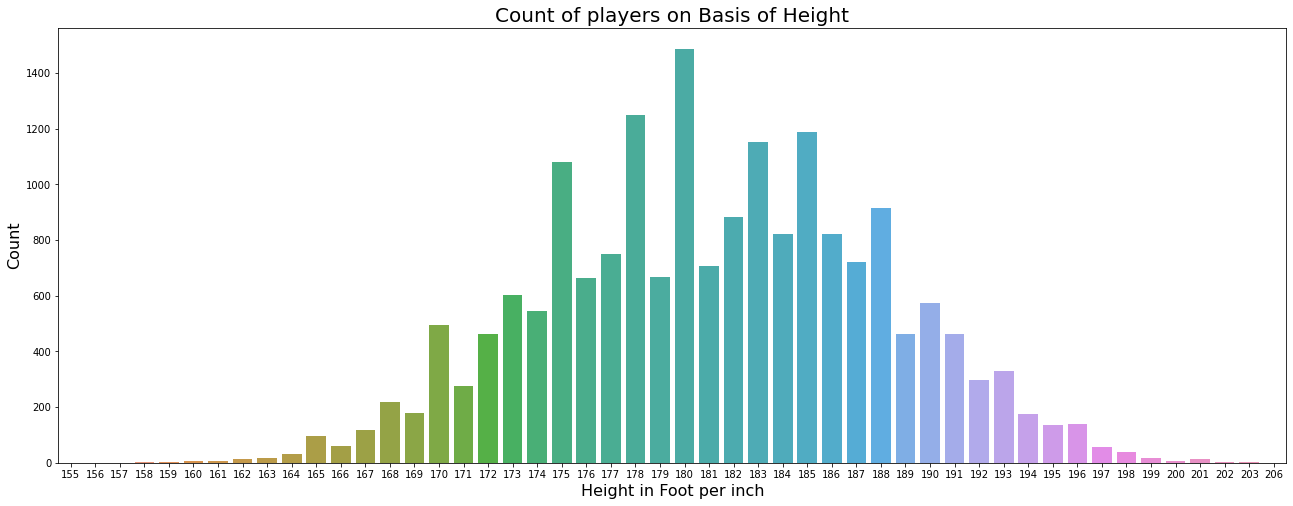

In [ ]:
import seaborn as sns
plt.figure(figsize = (22, 8))
ax = sns.countplot(x = 'height_cm', data=df_fifa)
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

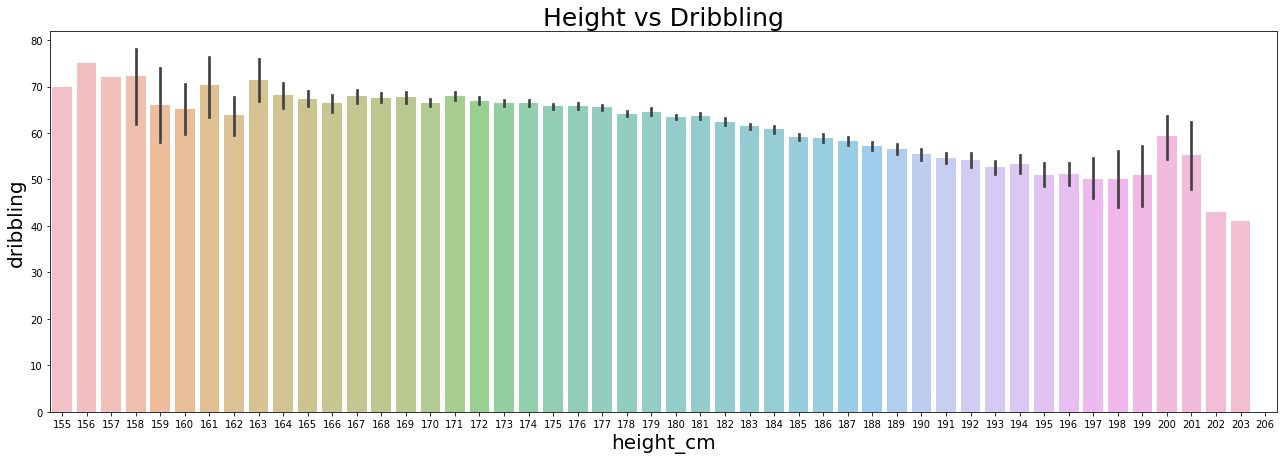

In [ ]:
plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize = 25)
sns.barplot(x='height_cm', y='dribbling', data=df_fifa.sort_values('height_cm', inplace=False), alpha=0.6)

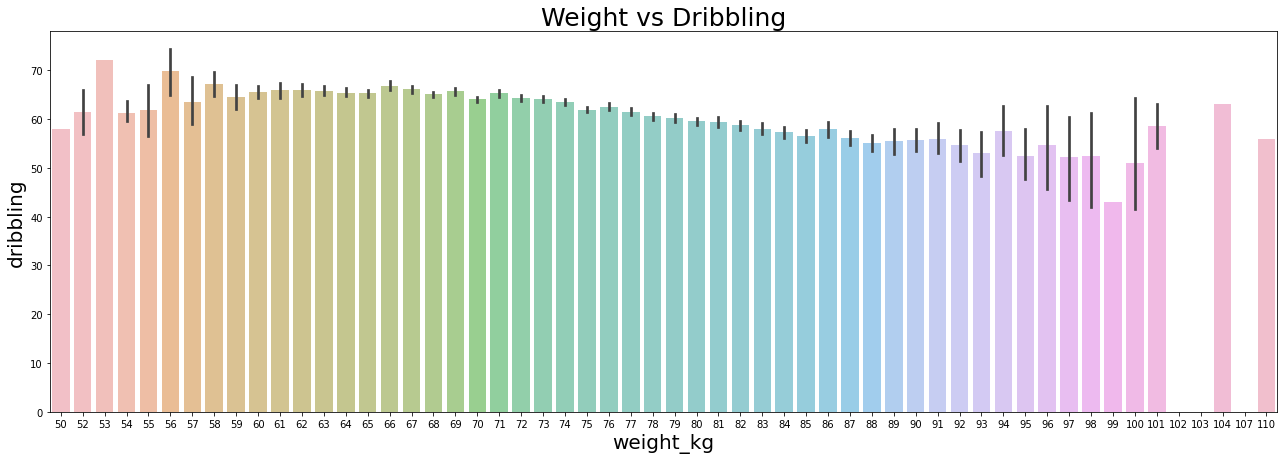

In [ ]:
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sns.barplot(x='weight_kg', y='dribbling', data=df_fifa.sort_values('weight_kg'),alpha=0.6)

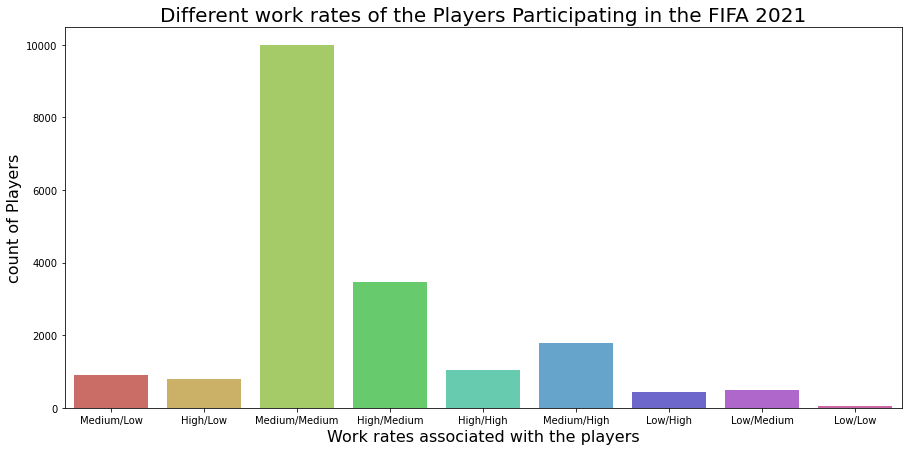

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'work_rate', data = df_fifa, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2021', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

In [ ]:
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

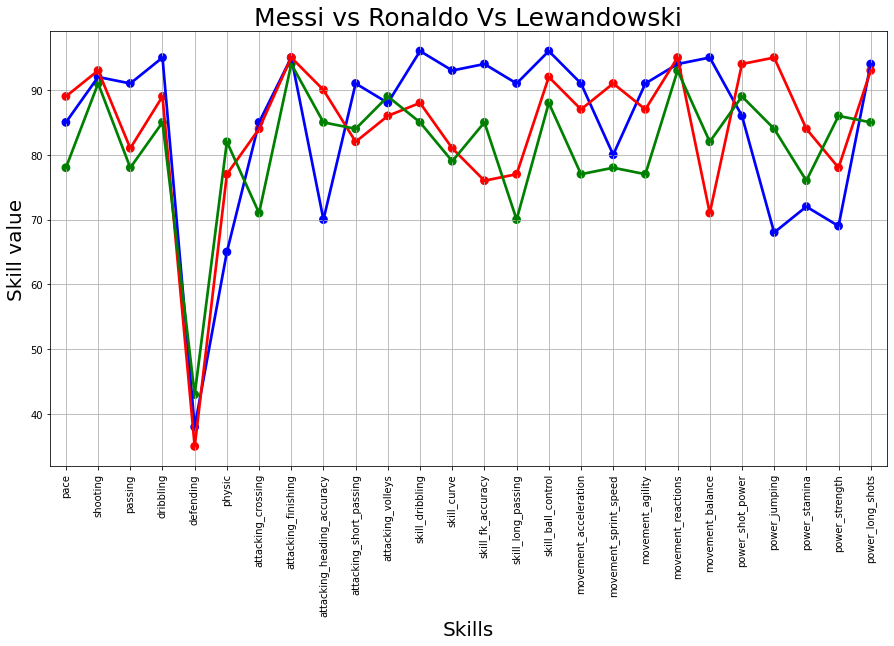

In [ ]:
messi = df_fifa.loc[df_fifa['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = df_fifa.loc[df_fifa['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
lewandowski = df_fifa.loc[df_fifa['short_name'] == 'R. Lewandowski']
lewandowski = pd.DataFrame(lewandowski, columns = skills)

plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)
sns.pointplot(data=lewandowski, color='green', alpha=0.6)

plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo Vs Lewandowski', fontsize = 25)
plt.grid()

In [ ]:
from IPython.display import display, HTML 

display(
    HTML(df_fifa.sort_values('overall', ascending=False)[['short_name', 'overall']][:10].to_html(index=False)
))


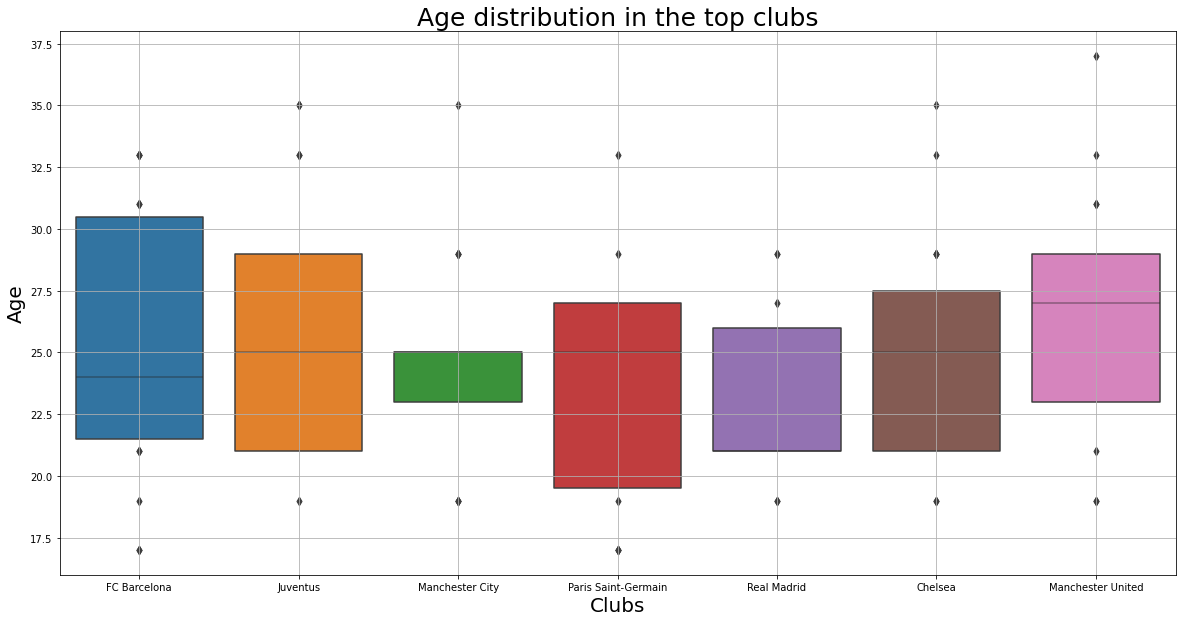

In [ ]:
top_club_names = ('FC Barcelona','Real Madrid', 'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Manchester City', 'Manchester United')
clubs = df_fifa.loc[df_fifa['club_name'].isin(top_club_names) & df_fifa['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="club_name", y="age", data=clubs)
ax.set_title(label='Age distribution in the top clubs', fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

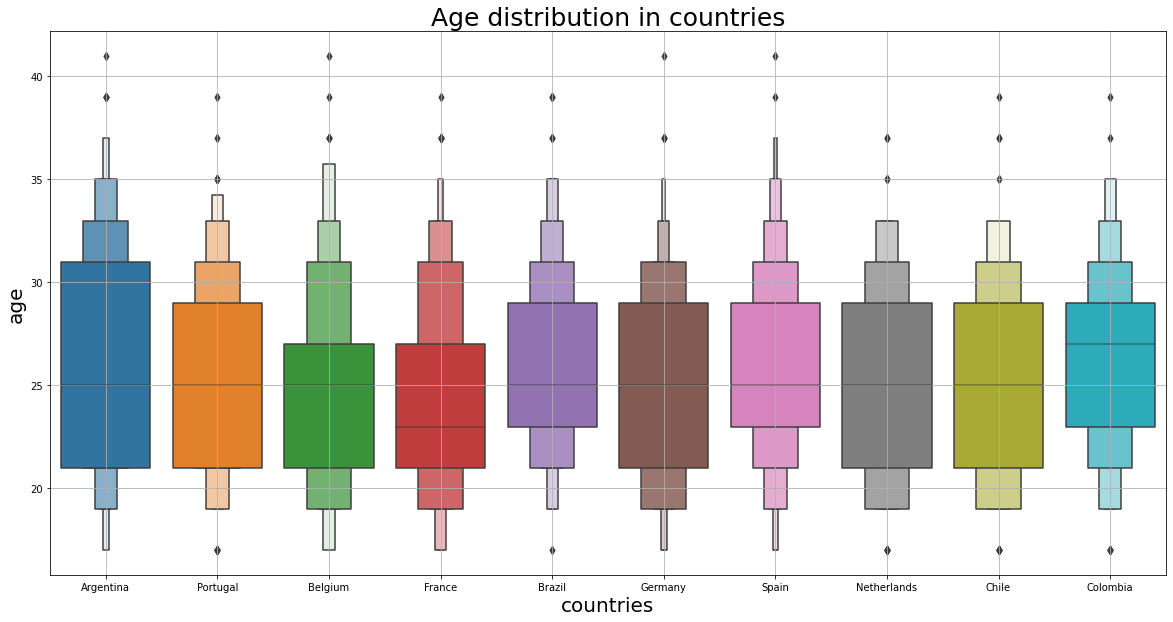

In [ ]:
countries_names = ('France', 'Brazil', 'Germany', 'Belgium', 'Spain', 'Netherlands', 'Argentina', 'Portugal', 'Chile', 'Colombia')
countries = df_fifa.loc[df_fifa['nationality'].isin(countries_names) & df_fifa['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="nationality", y="age", data=countries)
ax.set_title(label='Age distribution in countries', fontsize=25)
plt.xlabel('countries', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.grid()

In [ ]:
pr_cols=['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
  'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df_fifa.loc[df_fifa[pr_cols[i]].idxmax()][2]))
    i += 1

Best pace : K. Mbappé
Best shooting : Cristiano Ronaldo
Best passing : K. De Bruyne
Best dribbling : L. Messi
Best defending : V. van Dijk
Best physic : Casemiro
Best attacking_crossing : K. De Bruyne
Best attacking_finishing : L. Messi
Best attacking_heading_accuracy : L. de Jong
Best attacking_short_passing : K. De Bruyne
Best attacking_volleys : L. Suárez
Best skill_dribbling : L. Messi
Best skill_curve : Quaresma
Best skill_fk_accuracy : L. Messi
Best skill_long_passing : K. De Bruyne
Best skill_ball_control : L. Messi
Best movement_acceleration : Adama Traoré
Best movement_sprint_speed : K. Mbappé
Best movement_agility : Neymar Jr
Best movement_reactions : Cristiano Ronaldo
Best movement_balance : E. Oztumer
Best power_shot_power : A. Kolarov
Best power_jumping : Cristiano Ronaldo
Best power_stamina : V. Darida
Best power_strength : A. Akinfenwa
Best power_long_shots : L. Messi


In [ ]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina','Belgium', 'France', 'Brazil', 'Italy', 'Columbia') # defining a tuple consisting of country names
data_countries = df_fifa.loc[df_fifa['nationality'].isin(some_countries) & df_fifa['overall']] # extracting the overall data of the countries selected in the line above
data_countries.head()

sofifa_id                                         player_url  ...   rcb    rb
0      158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+3  62+3
4      190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  49+3  62+3
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...  ...  69+3  75+3
12     192119  https://sofifa.com/player/192119/thibaut-court...  ...  29+3  29+3
13     153079  https://sofifa.com/player/153079/sergio-aguero...  ...  51+3  56+3

[5 rows x 106 columns]

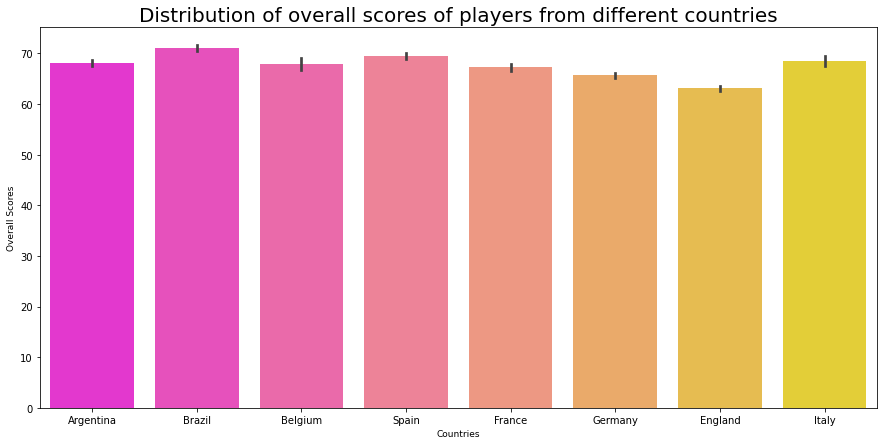

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['nationality'], y = data_countries['overall'], palette = 'spring') # creating a bargraph
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

# Imagens

Vamos entender um pouco sobre imagens em computadores.Computadores armazenam imagens como um mosaico de pequenos quadrados. É como a antiga forma de arte do mosaico de azulejos (como na figura abaixo).

<img align="center" width="1000" src="https://github.com/natmourajr/data/raw/main/image_processing_1.jpg?raw=1">


Agora, se esses ladrilhos quadrados forem muito grandes, será difícil fazer arestas e curvas suaves. Quanto mais ladrilhos usarmos, mais lisa ou, como dizemos, menos pixelizada será a imagem, e algumas vezes, isso é chamado de resolução das imagens. Aqui, temos a comparação entre duas imagens: uma com mais pixels de resolução e outra com menos pixels.

<img align="center" width="1000" src="https://github.com/natmourajr/data/raw/main/image_processing_2.jpg?raw=1">

Os gráficos vetoriais são um método um tanto diferente de armazenar imagens que visa evitar problemas relacionados aos pixels. Mas mesmo as imagens vetoriais, no final, são exibidas como um mosaico de pixels. A palavra pixel significa um elemento de imagem. Uma maneira simples de descrever cada pixel é usar uma combinação de três cores, ou seja, Vermelho, Verde, Azul. Isso é o que chamamos de imagem RGB.

Cada fotografia, em formato digital, é composta por pixels. Eles são a menor unidade de informação que compõe uma imagem. Normalmente redondos ou quadrados, eles são normalmente organizados em uma grade bidimensional.

Agora, se todos os três valores estão com intensidade total, isso significa que eles são 255 (para o caso de 8 bits). Ele então é mostrado como branco, e se todas as três cores são silenciadas, ou tem o valor 0, a cor é mostrada como preto. A combinação desses três, por sua vez, nos dará um tom específico da cor do pixel. Como cada número é um número de 8 bits, os valores variam de 0 a 255.

<img align="center" width="1000" src="https://github.com/natmourajr/data/raw/main/image_processing_3.jpeg?raw=1">


A combinação dessas três cores tende para o maior valor entre elas. Uma vez que cada valor pode ter 256 diferentes intensidades ou valores de brilho, ele totaliza 16,8 milhões de tons. Agora vamos carregar uma imagem e observar suas várias propriedades em geral.

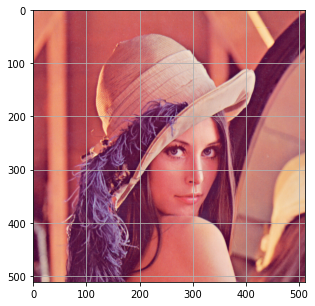

In [ ]:
import imageio # biblioteca de leitura de imagens em python 
import matplotlib.pyplot as plt
#%matplotlib inline # caso queiram rodar em outro tipo de notebook , utilizem
pic = imageio.imread("https://github.com/natmourajr/data/raw/main/lenna.png")
plt.figure(figsize = (5,5))
plt.imshow(pic)
plt.grid()
#plt.axis('off');

In [ ]:
pic.shape

(512, 512, 3)

Aparentemente, esta imagem tem 512x512 (quantidade de pixels) e tem 3 canais de leitura (RGB)

In [ ]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Height {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (512, 512, 3)
Image Hight 512
Image Width 512
Dimension of Image 3


A forma do ndarray mostra que é uma matriz de três camadas. Os primeiros dois números aqui são comprimento e largura, e o terceiro número (ou seja, 3) é para três camadas: Vermelho, Verde, Azul. Então, se calcularmos o tamanho de uma imagem RGB, o tamanho total será contado como altura x largura x 3

In [ ]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 786432
Maximum RGB value in this image 255
Minimum RGB value in this image 3


In [ ]:
# Vamos selecionar o valor específico de um pixel na posição
# linha=100, coluna=50 para cada um dos canais disponíveis R,G,B 
print('Value of pixel (100,50) only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of pixel (100,50) only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of pixel (100,50) only B channel {}'.format(pic[ 100, 50, 2]))

Value of pixel (100,50) only R channel 232
Value of pixel (100,50) only G channel 140
Value of pixel (100,50) only B channel 120


Vamos olhar cada um dos canais separadamente

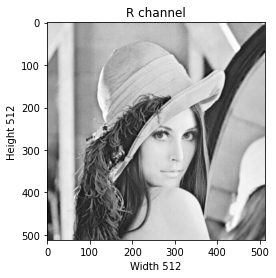

In [ ]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0],cmap = plt.get_cmap(name = 'gray'))
plt.show()

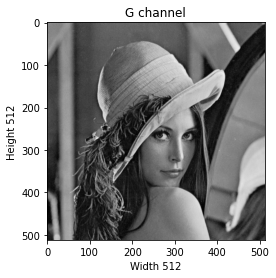

In [ ]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1], cmap = plt.get_cmap(name = 'gray')) 
plt.show()

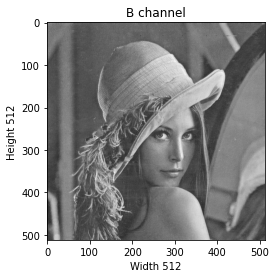

In [ ]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2], cmap = plt.get_cmap(name = 'gray')) 
plt.show()

Agora, também podemos alterar os valores dos pixels da matriz em RGB. Como exemplo, vamos definir a camada vermelha, verde e azul para seguir os valores das linhas para a intensidade total.
*   Canal R: Linha - 100 a 110
*   Canal G: Linha - 200 a 210
*   Canal B: Linha - 300 a 310

Vamos carregar a imagem uma vez para que possamos visualizar cada mudança simultaneamente.

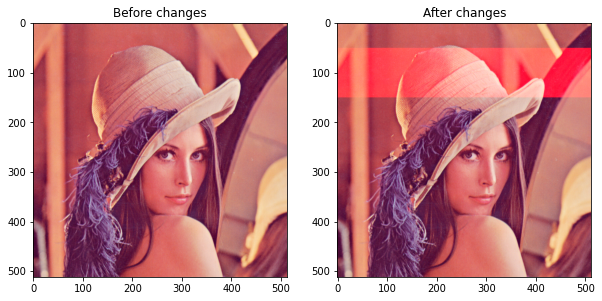

In [ ]:
from copy import copy, deepcopy

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(pic)
axs[0].set_title("Before changes")
pic_changed = deepcopy(pic) # copiei a image para evitar distorções na original
pic_changed[50:150 , : , 0] = 255 # intensidade completa para esses pixels do canal R
axs[1].imshow(pic_changed) 
axs[1].set_title("After changes")
plt.show()

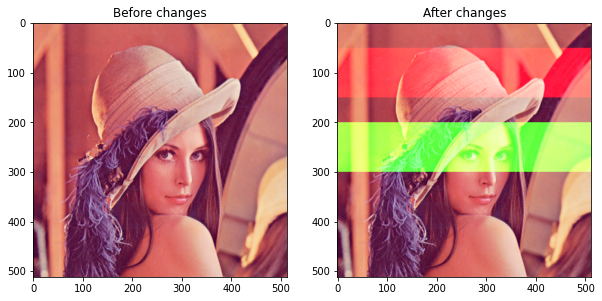

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(pic)
axs[0].set_title("Before changes")
pic_changed[200:300 , : , 1] = 255 # intensidade completa para esses pixels do canal G
axs[1].imshow(pic_changed) 
axs[1].set_title("After changes")
plt.show()

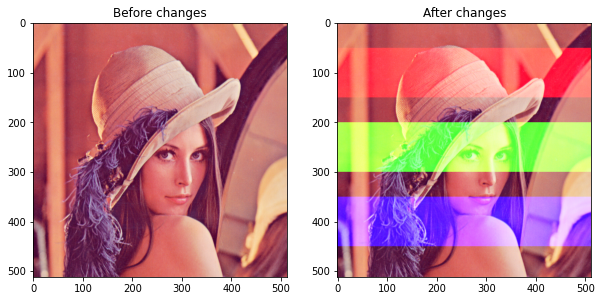

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(pic)
axs[0].set_title("Before changes")
pic_changed[350:450 , : , 2] = 255 # intensidade completa para esses pixels do canal B
axs[1].imshow(pic_changed) 
axs[1].set_title("After changes")
plt.show()

Vamos manipular os três canais de pixels ao mesmo tempo

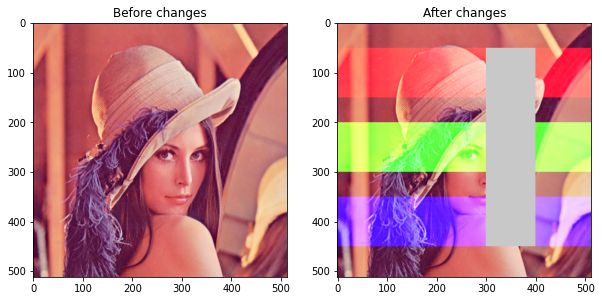

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(pic)
axs[0].set_title("Before changes")
pic_changed[ 50:450 , 300:400 , [0,1,2] ] = 200  # mudando todos os canais
axs[1].imshow(pic_changed) 
axs[1].set_title("After changes")
plt.show()

## Dividindo Camadas
Agora, sabemos que cada pixel da imagem é representado por três inteiros. Dividir a imagem em componentes de cores separados é apenas uma questão de retirar a fatia correta da matriz da imagem.

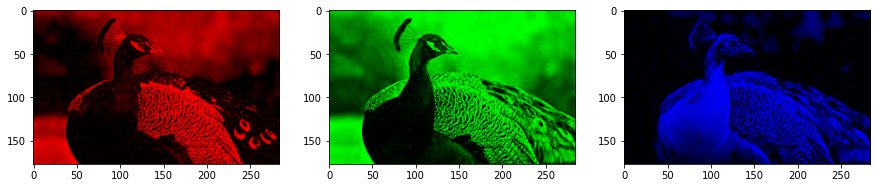

In [ ]:
import numpy as np 
pic = imageio.imread("https://github.com/natmourajr/data/raw/main/pavao.jpeg") 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype': 'numpy.float64'  # acessando cada canal
     split_img[ :, :, c] = pic[ :, :, c] # mostrando cada canal
     ax.imshow(split_img)

In [ ]:
lista = ['a', 'b', 'c']
for idx, elemento in enumerate(lista):
  print(idx, elemento)

0 a
1 b
2 c


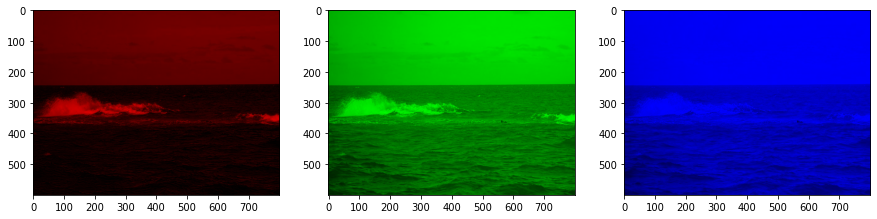

In [ ]:
import numpy as np 
pic = imageio.imread("https://s2.glbimg.com/bc8VFjerWxg6Tnr1Ig-qtX5dm1Y=/e.glbimg.com/og/ed/f/original/2018/10/10/800px-wave_open_sea.jpg") 
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in enumerate(axs):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype': 'numpy.float64'  # acessando cada canal
     split_img[ :, :, c] = pic[ :, :, c] # mostrando cada canal
     ax.imshow(split_img)

## Transformação para Escala de Cinza
Alguns processamentos de imagem (extração de bordas e filtragens) são realizados em imagens em tons de cinza (greyscale). Esta transformação pode ser feita de algumas maneiras. Em ferramentas de processamento de imagem, por exemplo: no OpenCV, muitas funções usam imagens em tons de cinza antes do processamento, e isso é feito porque simplifica a imagem, agindo quase como uma redução de ruído e aumentando o tempo de processamento, pois há menos informação nas imagens.
Existem algumas maneiras de fazer isso em python para converter uma imagem em tons de cinza, mas uma maneira simples de usar matplotlib é pegar a média ponderada do valor RGB da imagem original usando esta fórmula.

$Y' = 0.299\cdot R + 0.587\cdot G + 0.114\cdot B$

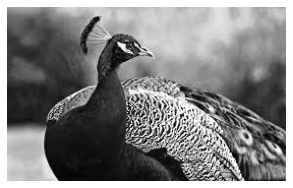

In [ ]:
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg') 
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.axis('off');
plt.show()

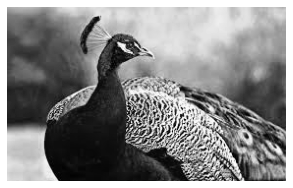

In [ ]:
from skimage.color import rgb2gray

pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg') 
gray = rgb2gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.axis('off');
plt.show()

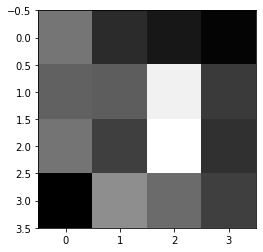

In [ ]:
plt.imshow(1.*np.eye(4)+ 10*np.random.rand(4,4), plt.get_cmap(name = 'gray'))

In [ ]:
plt.imshow(1.*np.eye(4)+ 10*np.random.rand(4,4), plt.get_cmap(name = 'gray'))

In [ ]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

## Transformações outras

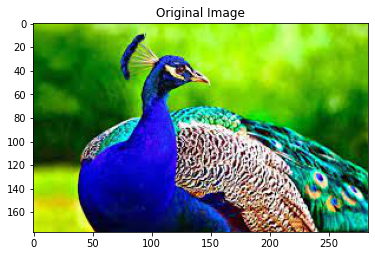

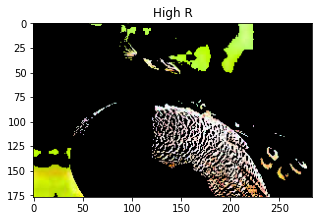

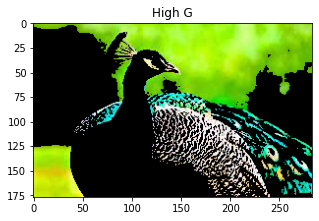

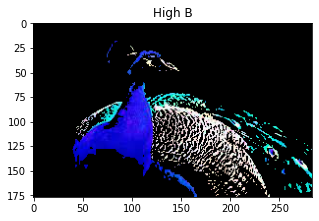

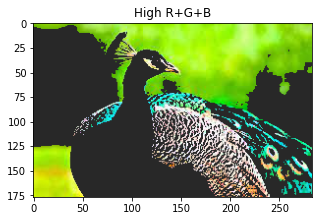

In [ ]:
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
plt.title('Original Image')
plt.imshow(pic)

# Only Red Pixel value , higher than 180
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
red_mask = pic[:, :, 0] < 180
pic[red_mask] = 0
plt.figure(figsize=(5,5))
plt.title('High R')
plt.imshow(pic)

# Only Green Pixel value , higher than 180
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
green_mask = pic[:, :, 1] < 180
pic[green_mask] = 0
plt.figure(figsize=(5,5))
plt.title("High G")
plt.imshow(pic)

# Only Blue Pixel value , higher than 180
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
blue_mask = pic[:, :, 2] < 180
pic[blue_mask] = 0
plt.figure(figsize=(5,5))
plt.title("High B")
plt.imshow(pic)

# Composite mask using logical_and
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(5,5))
plt.title("High R+G+B")
plt.imshow(pic);

In [ ]:
pic.shape

(177, 284, 3)

In [ ]:
final_mask

Array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

## Detecção de bordas

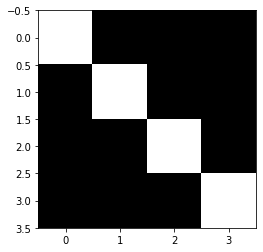

In [ ]:
plt.imshow(1.*np.eye(4), plt.get_cmap(name = 'gray'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_uint
from scipy.signal import convolve2d
import warnings
warnings.filterwarnings("ignore")

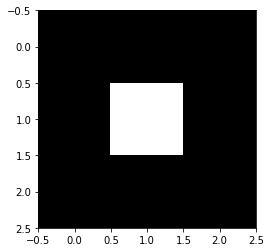

In [ ]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])
plt.imshow(kernel_edgedetection, cmap = 'gray');

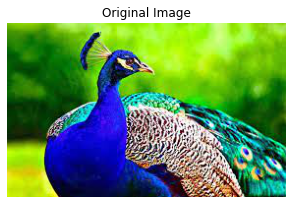

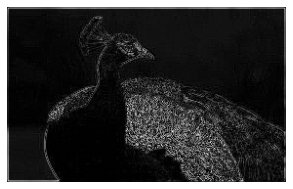

In [ ]:
from scipy.signal import convolve2d
pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
plt.figure(figsize=(5,5))
plt.title('Original Image')
plt.imshow(pic)
plt.axis('off')

pic = imageio.imread('https://github.com/natmourajr/data/raw/main/pavao.jpeg')
pic_gray = rgb2gray(pic)
plt.figure(figsize=(5,5))
conv_im1 = convolve2d(pic_gray, kernel_edgedetection)
plt.imshow(abs(conv_im1) , cmap='gray');
plt.axis('off');

## Exemplos de análise

### Levantamento da distribuição de pixels
Faça para todos os canais de uma imagem específica a distribuição dos valores dos pixels desta, levantando o valor de média, moda e mediana.

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
# abrir uma imagem especifica
pic = imageio.imread("https://github.com/natmourajr/data/raw/main/lenna.png")

# fazer um loop por canais da imagem (RBG)
# levantar o valor de cada um dos pixels do respectivo canal e preencher uma variável auxilar (vetor de valores) -> Vetorizar o canal
# desenhar um histograma ou box-plot para esta distribuição
# marcar os parâmetros pedidos neste plot (histograma)

In [ ]:
pic[:,:,0].shape

(512, 512)

In [ ]:
np.reshape(np.array(pic[:,:,0]),-1)

array([226, 226, 223, ..., 179, 181, 185], dtype=uint8)

In [ ]:
np.mean(np.reshape(np.array(pic[:,:,0]),-1))

180.22365951538086

In [ ]:
np.median(np.reshape(np.array(pic[:,:,0]),-1))

197.0

In [ ]:
import scipy.stats as stats
stats.mode(np.reshape(np.array(pic[:,:,0]),-1), axis=0)[0][0]

224

### Encontrar um padrão em uma imagem ruidosa
Por muitas vezes, devemos encontrar uma imagem dentro de uma outra imagem. Este processo é chamado de *template location*. Vamos fazer este processo e para isso sigam este passo a passo

1.   Abrir a imagem da lenna (já feito)
2.   Colocar a imagem em escala de cinza
3.   Subtrair a média dos valores dos pixels (pré-processamento) da mesma
4. Encontrar os valores de pixels e largura de caixa que contemple o olho direito da modelo
5. Criar uma **figura** auxiliar com a região de interesse
6. Adicionar um ruído aleatório para imagem original (distribuição de ruído = gaussiana com média zero e variância unitária)
7. Fazer a correlação entre a imagem e a figura auxiliar
8. Encontrar o ponto de maior correlação 
9. Marcar este ponto na imagem e ver se faz sentido. 


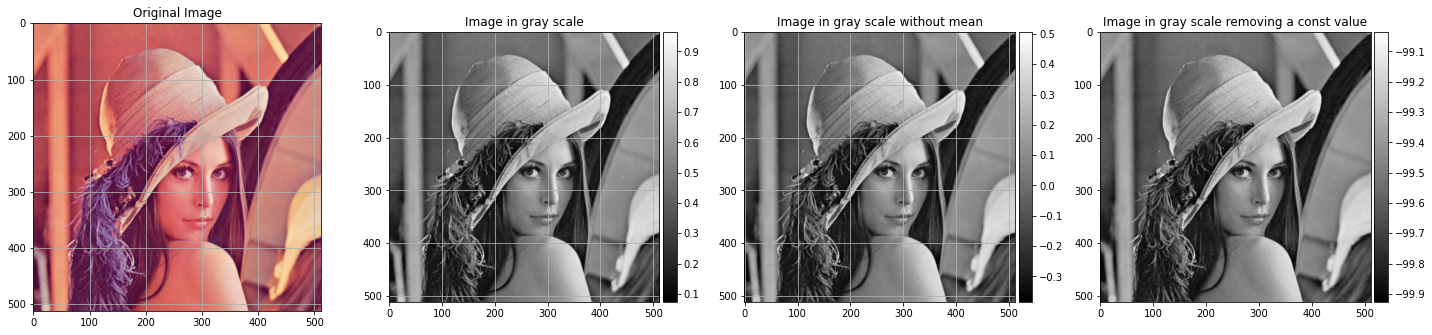

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from copy import copy, deepcopy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# abrir uma imagem especifica - Lenna
pic = imageio.imread("https://github.com/natmourajr/data/raw/main/lenna.png")

fig, axs = plt.subplots(nrows = 1, ncols=4, figsize=(20,5))  

# mostrando a imagem com os eixos e com grid
axs[0].set_title('Original Image')
axs[0].imshow(pic)
axs[0].grid()

# transformando a imagem em escala de cinza
gray_pic = rgb2gray(pic)
axs[1].set_title('Image in gray scale')
im1 = axs[1].imshow(gray_pic, cmap='gray')
axs[1].grid()
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# subtrair a média dos valores dos pixels
mean_out_pic = deepcopy(gray_pic)
mean_out_pic = mean_out_pic - mean_out_pic.mean()
axs[2].set_title('Image in gray scale without mean')
im2 = axs[2].imshow(mean_out_pic, cmap='gray')
axs[2].grid()

# codigo para criar uma colorbar em um subeixo especifico
divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# subtrair um valor constante da minha imagem
const_sub_pic = deepcopy(gray_pic)
const_sub_pic = const_sub_pic - 100
axs[3].set_title('Image in gray scale removing a const value')

im3 = axs[3].imshow(const_sub_pic, cmap='gray')

# codigo para criar uma colorbar em um subeixo especifico
divider = make_axes_locatable(axs[3])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

plt.tight_layout()

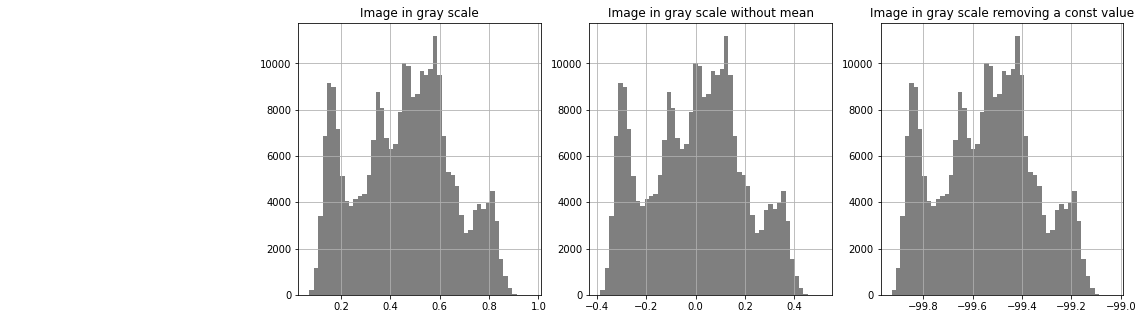

In [ ]:
# usando como base a análise anterior, fazer o histograma dos valores 
# dos pixels para as imagens em escala de cinza
fig, axs = plt.subplots(nrows = 1, ncols=4, figsize=(20,5)) 
axs[0].axis('off');

# para imagem em escala de cinza
gray_pic = rgb2gray(pic)
axs[1].set_title('Image in gray scale')
axs[1].hist(np.reshape(np.array(gray_pic),-1), bins=50, 
            color='black', alpha=0.5, 
            label='Distribuição dos valores do Pixels');
axs[1].grid()

# para a imagem em escala de cinza sem a média
mean_out_pic = deepcopy(gray_pic)
mean_out_pic = mean_out_pic - mean_out_pic.mean()
axs[2].set_title('Image in gray scale without mean')
axs[2].hist(np.reshape(np.array(mean_out_pic),-1), bins=50, 
            color='black', alpha=0.5, 
            label='Distribuição dos valores do Pixels sem média');
axs[2].grid()

#  para a imagem com subtração um valor constante
const_sub_pic = deepcopy(gray_pic)
const_sub_pic = const_sub_pic - 100
axs[3].set_title('Image in gray scale removing a const value')
axs[3].hist(np.reshape(np.array(const_sub_pic),-1), bins=50, 
            color='black', alpha=0.5, 
            label='Distribuição dos valores do Pixels com redução do valor');
axs[3].grid()



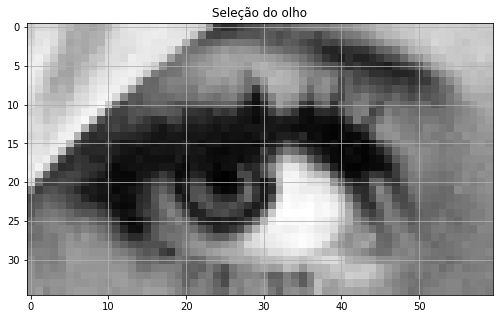

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(15,5))  

# selecionar a caixa do olho
caixa_olho = deepcopy(mean_out_pic)
caixa_olho = caixa_olho[245:280, 240:300]

# mostrando a imagem com os eixos e com grid
axs.set_title('Seleção do olho')
axs.imshow(caixa_olho, cmap='gray')
axs.grid()


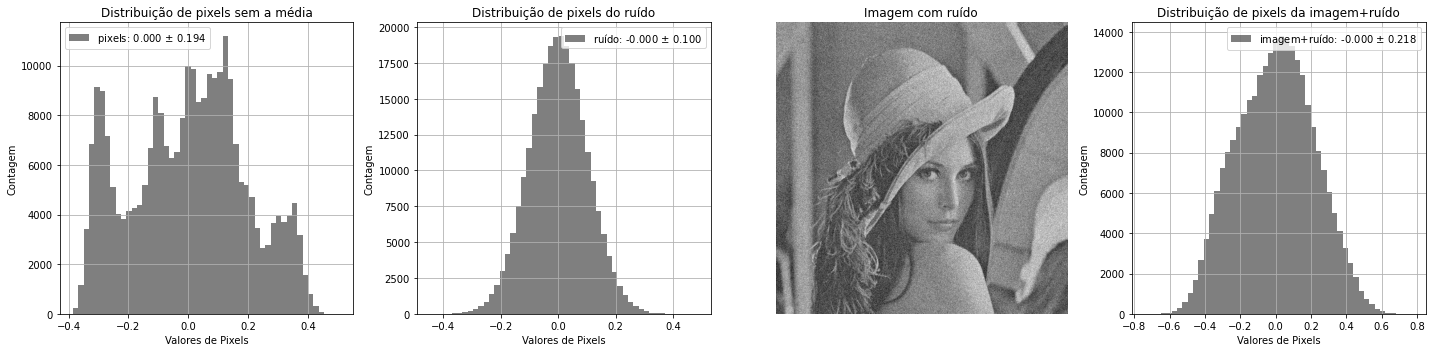

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=4, figsize=(20,5))  

# adicionar ruido aleatório (normal -> gaussiana media zero variancia unitaria) a imagem sem média
from numpy.random import Generator, PCG64
gerador = Generator(PCG64())
gray_noise_pic = deepcopy(mean_out_pic)

# olhar a distribuição de pixels
count, bins, patches = axs[0].hist(np.reshape(np.array(gray_noise_pic),-1), 
                                   bins=50,color='black', alpha=0.5, 
                                   label='pixels: %1.3f $\pm$ %1.3f'%(gray_noise_pic.mean(),gray_noise_pic.std()));
axs[0].legend(loc='best')
axs[0].grid()
axs[0].set_title('Distribuição de pixels sem a média')
axs[0].set_xlabel('Valores de Pixels')
axs[0].set_ylabel('Contagem')

# Quando eu multiplico o ruído por uma constante < 1, eu estou 
# diminuindo a "potência" do mesmo.

# Quando eu multiplico o ruído por uma constante > 1, eu estou 
# aumentando a "potência" do mesmo.

ruido = 0.1*gerador.standard_normal(gray_noise_pic.shape)
gray_noise_pic = gray_noise_pic + ruido

# olhar a distribuição do ruido
# colocar na legenda o valor da média e da variância do ruído
count, bins, patches = axs[1].hist(np.reshape(np.array(ruido),-1), 
                                   bins=50,color='black', alpha=0.5, 
                                   label='ruído: %1.3f $\pm$ %1.3f'%(ruido.mean(),ruido.std()));
#print('Mean: ', ruido.mean(), ' e Desvio Padrão: ', ruido.std())
axs[1].legend(loc='best', fontsize=10)
axs[1].grid()
axs[1].set_title('Distribuição de pixels do ruído')
axs[1].set_xlabel('Valores de Pixels')
axs[1].set_ylabel('Contagem')

axs[2].set_title('Imagem com ruído')
axs[2].imshow(gray_noise_pic, cmap='gray')
axs[2].grid()
axs[2].axis('off')

# olhar a distribuição da imagem + ruido
count, bins, patches = axs[3].hist(np.reshape(np.array(gray_noise_pic),-1), 
                                   bins=50,color='black', alpha=0.5, 
                                   label='imagem+ruído: %1.3f $\pm$ %1.3f'%(gray_noise_pic.mean(),gray_noise_pic.std()));
axs[3].legend(loc='best')
axs[3].grid()
axs[3].set_title('Distribuição de pixels da imagem+ruído')
axs[3].set_xlabel('Valores de Pixels')
axs[3].set_ylabel('Contagem')

plt.tight_layout()

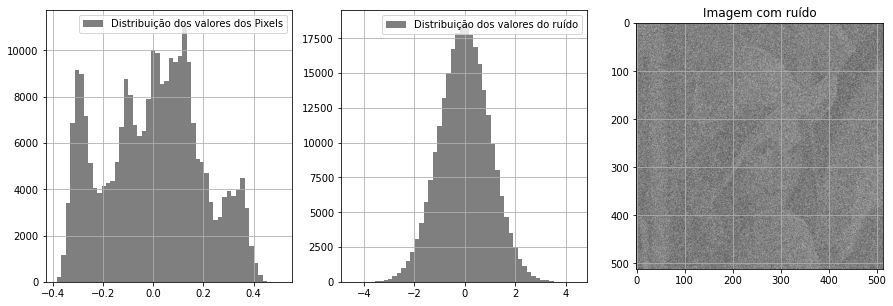

In [ ]:
# fazer a adição de ruído branco de outra maneira!
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  

# copiar a imagem sem média
gray_noise_pic = deepcopy(mean_out_pic)

# olhar a distribuição de pixels
count, bins, patches = axs[0].hist(np.reshape(np.array(gray_noise_pic),-1), 
                                   bins=50,color='black', alpha=0.5, 
                                   label='Distribuição dos valores dos Pixels');
axs[0].legend(loc='best')
axs[0].grid()

ruido = 1.0*np.random.randn(gray_noise_pic.shape[0], gray_noise_pic.shape[1])
gray_noise_pic = gray_noise_pic + ruido

# olhar a distribuição do ruido
count, bins, patches = axs[1].hist(np.reshape(np.array(ruido),-1), 
                                   bins=50,color='black', alpha=0.5, 
                                   label='Distribuição dos valores do ruído');
axs[1].legend(loc='best')
axs[1].grid()

axs[2].set_title('Imagem com ruído')
axs[2].imshow(gray_noise_pic, cmap='gray')
axs[2].grid()

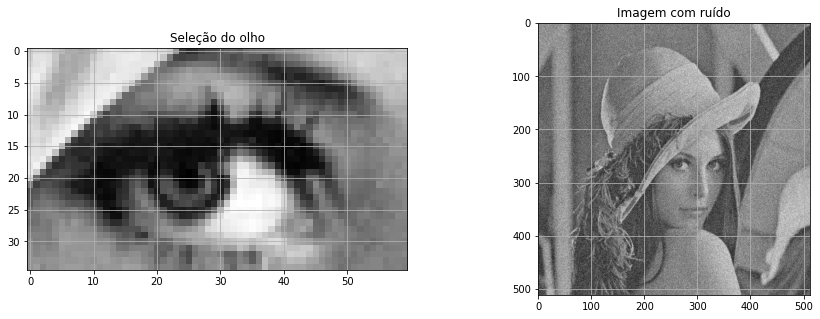

In [ ]:
from scipy import signal

fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(15,5))  

# selecionar a caixa do olho
caixa_olho = deepcopy(mean_out_pic)
caixa_olho = caixa_olho[245:280, 240:300]

# mostrando a imagem com os eixos e com grid
axs[0].set_title('Seleção do olho')
axs[0].imshow(caixa_olho, cmap='gray')
axs[0].grid()

axs[1].set_title('Imagem com ruído')
axs[1].imshow(gray_noise_pic, cmap='gray')
axs[1].grid()

corr = signal.correlate2d(gray_noise_pic, caixa_olho, 
                           mode='same', boundary='symm')


In [ ]:
corr[0][0]

-4.940569223644634

In [ ]:
corr.max()

69.57933775499994

In [ ]:
for i in range(0, corr.shape[0]):
  for j in range(0, corr.shape[1]):
    if corr[i][j] == corr.max():
      x_max = i
      y_max = j
      print(i,j)

262 269


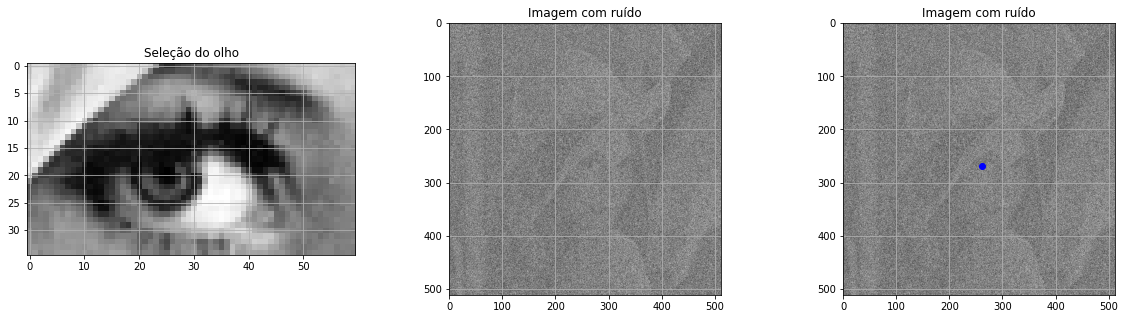

In [ ]:
from scipy import signal

fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(20,5))  

# selecionar a caixa do olho
caixa_olho = deepcopy(mean_out_pic)
caixa_olho = caixa_olho[245:280, 240:300]

# mostrando a imagem com os eixos e com grid
axs[0].set_title('Seleção do olho')
axs[0].imshow(caixa_olho, cmap='gray')
axs[0].grid()

axs[1].set_title('Imagem com ruído')
axs[1].imshow(gray_noise_pic, cmap='gray')
axs[1].grid()

corr = signal.correlate2d(gray_noise_pic, caixa_olho, 
                           mode='same', boundary='symm')
for i in range(0, corr.shape[0]):
  for j in range(0, corr.shape[1]):
    if corr[i][j] == corr.max():
      x_max = i
      y_max = j
      
# marcar o ponto de maxima correlação
axs[2].set_title('Imagem com ruído')
axs[2].imshow(gray_noise_pic, cmap='gray')
axs[2].grid()
axs[2].plot(x_max, y_max,'bo')

# Arquivos de Áudio

Geralmente, gravações de sons são armazenadas em arquivos de áudio digital no formato .wav. As ondas sonoras são digitalizadas por um processo de amostragem em intervalos igualmente separados pelo que chamados de taxa de amostragem (normalmente 44,1 kHz para áudio com qualidade de CD, o que significa que as amostras são obtidas 44.100 vezes em segundo).

Em processamento de sinais, o processo de amostragem é a redução de um sinal contínuo em uma série de valores discretos. A frequência ou taxa de amostragem é o número de amostras obtidas em um determinado período de tempo. Uma alta frequência de amostragem resulta em menos perda de informação, mas maior custo computacional, e baixas frequências de amostragem têm maior perda de informação, mas são rápidas e menos custosas computacionalmente para se calcular.

A cada amostra, a amplitude da onda em um determinado naquele tempo é registrado em uma quantidade de bits (amplitude). Ou seja, a quantidade de bits determina o quão detalhada a amostra será e, também, define a faixa dinâmica do sinal (normalmente 16 bits, o que significa que uma amostra pode variar de 65.536 valores de amplitude). Abaixo podemos ver uma figura demonstrativa como este processo se dá. Cada uma das amostradas foi representada em um vector de dados.

<img align="center" width="1000" src="https://github.com/natmourajr/data/raw/main/audio_processing_1.png?raw=1">



### Abertura de um arquivo de audio

In [ ]:
import os
import librosa
import IPython

if not os.path.exists('audio_example_1.wav'):
  !wget https://github.com/natmourajr/data/raw/main/audio_example_1.wav

samples , sampling_rate = librosa.load("audio_example_1.wav")
print("Sampling rate is %i Hz"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio("audio_example_1.wav")

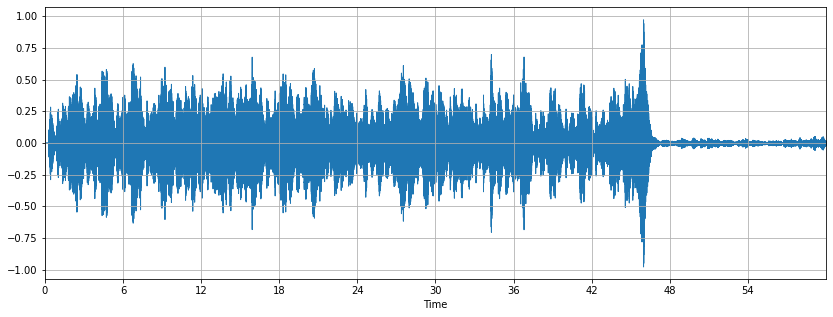

In [ ]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sampling_rate)
plt.grid()

In [ ]:
print(samples)

[-9.1552734e-05 -3.0517578e-05  0.0000000e+00 ... -2.9602051e-03
 -2.8991699e-03 -3.8757324e-03]


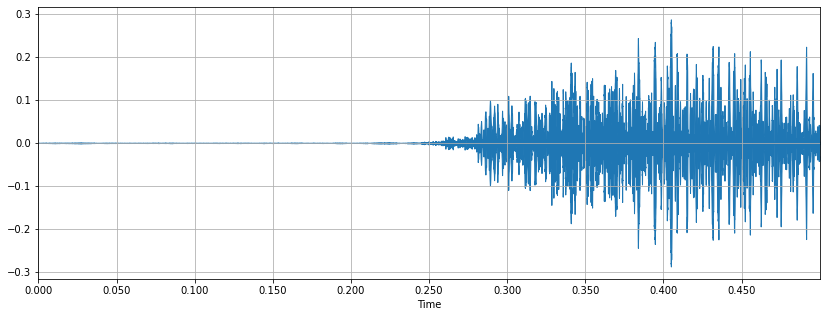

In [ ]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples[0:int(0.5*sampling_rate)], sr=sampling_rate)
plt.grid()

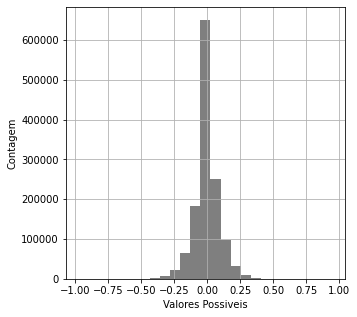

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# levantamento da distribuição das amostras de audio

fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(5,5)) 

axs.hist(samples, bins=25, 
            color='black', alpha=0.5, 
            label='Distribuição dos valores das amostras');
axs.grid()
axs.set_xlabel("Valores Possiveis");
axs.set_ylabel("Contagem");

In [ ]:
import os
import librosa
import IPython
if not os.path.exists('audio_processing_mb_cisne.mp3'):
  !wget https://github.com/natmourajr/data/raw/main/audio_processing_mb_cisne.mp3

samples , sampling_rate = librosa.load("audio_processing_mb_cisne.mp3")
print("Sampling rate is %i"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio("audio_processing_mb_cisne.mp3")

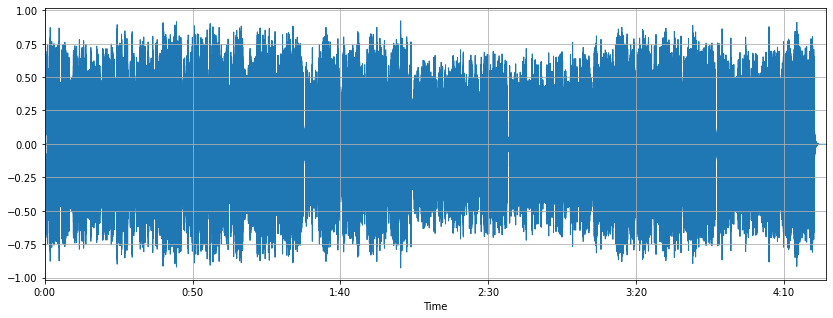

In [ ]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sampling_rate)
plt.grid()

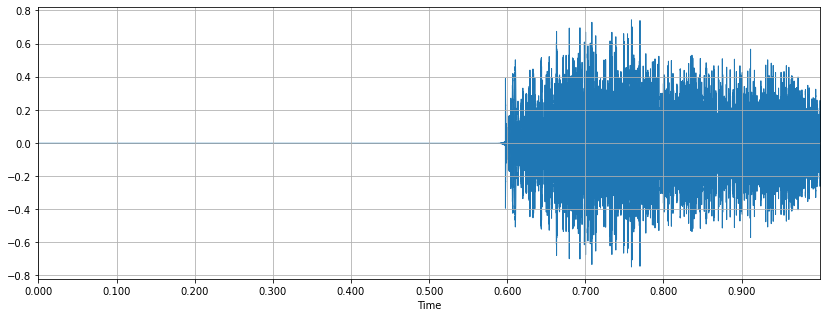

In [ ]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples[0:1*sampling_rate], sr=sampling_rate)
plt.grid()

Uma outra maneira de se ler arquivos de áudio é através da biblioteca scipy

In [ ]:
from scipy.io.wavfile import read, write

if not os.path.exists('audio_example_1.wav'):
  !wget https://github.com/natmourajr/data/raw/main/audio_example_1.wav

sampling_rate, samples = read("audio_example_1.wav")

print("Sampling rate is %i"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio(samples, rate=sample_rate)

## Gravando o audio do seu microfone

### Primeiro Método


In [ ]:
!pip install ffmpeg-python

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
samples, sampling_rate = get_audio()

In [ ]:
print("Sampling rate is %i"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

Sampling rate is 48000
Number of Samples in this file is 190080
Record time is 3.960 seconds


### Segundo Método


In [ ]:
#@markdown Install ddsp, define some helper functions, and download the model. This transfers a lot of data and _should take a minute or two_.
print('Installing from pip package...')
!pip install -qU ddsp==1.6.5

# Ignore a bunch of deprecation warnings
import warnings
warnings.filterwarnings("ignore")

import copy
import os
import time

import crepe
import ddsp
import ddsp.training
from ddsp.colab.colab_utils import (
    auto_tune, get_tuning_factor, download, 
    play, record, specplot, upload, 
    DEFAULT_SAMPLE_RATE)
from ddsp.training.postprocessing import (
    detect_notes, fit_quantile_transform
)
import gin
from google.colab import files
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Helper Functions
#sample_rate = DEFAULT_SAMPLE_RATE

print('Done!')

Installing from pip package...
Done!


In [ ]:
sampling_rate    =     44100 #@param {type:"number", min:4000, max:600000, step:1000}
record_seconds =     5 #@param {type:"number", min:1, max:10, step:1}

samples = record(seconds=record_seconds, 
               sample_rate=sampling_rate)
if len(samples.shape) == 1:
  samples = samples[np.newaxis, :]

Starting recording for 5 seconds...


<IPython.core.display.Javascript object>

Finished recording!


In [ ]:
from IPython.display import HTML, Audio
IPython.display.Audio(samples, rate=sampling_rate)

NameError: ignored

In [ ]:
print("Sampling rate is %i"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[1]))
print("Record time is %1.3f seconds"%(float(samples.shape[1]/sampling_rate)))

Sampling rate is 44100
Number of Samples in this file is 219618
Record time is 4.980 seconds


## Transformação Tempo-Frequência

Geralmente, quando estamos analisando arquivos de áudio, pensamos sempre em transformações do tipo tempo-frequência. Estas transformações, na grande maioria das vezes se apoia na transformada de Fourier. A transformada de Fourier (FT) é uma transformação matemática que decompõe funções em uma base de frequências de interesse. Por exemplo: podemos analisar a resposta de uma música como função de seu acorde básico e em termos de seus componentes frequenciais e suas amplitudes. O termo transformada de Fourier se refere à representação no domínio da frequência e à operação matemática que associa a representação do domínio da frequência a uma função de espaço ou tempo. Abaixo podemos ver a transformada de Fourier

$F(\omega) = \int_{-\infty}^{+\infty} f(t) e^{-j\omega t} \partial t $

A transformada de Fourier de uma função de tempo é uma função de frequência de valor complexo, cuja magnitude (valor absoluto) representa a quantidade dessa frequência presente na função original, e cujo argumento é o deslocamento de fase da senoide básica naquela frequência. A transformada de Fourier não se limita às funções de tempo, mas o domínio da função original é comumente referido como domínio do tempo. Há também uma transformada inversa de Fourier que sintetiza matematicamente a função original a partir de sua representação no domínio da frequência, conforme comprovado pelo teorema de inversão de Fourier, como podemos ver abaixo

$\hat{f}(t) = \int_{-\infty}^{+\infty} F(\omega) e^{+j\omega t} \partial \omega $

Como pode ser observado anteriormente, a transformada de Fourier apresentada representa a transformada de Fourier para tempo contínuo. Para o tempo discreto, temos pequenas modificações que devem ser aplicadas. Para uma sequência de valores de tamanho $N$,  podemos definir a sua transformada de fourier em tempo discreto (DFT) como sendo

$y[k] = \sum_{n=0}^{N-1}e^{-2\pi j \frac{kn}{N}} x[n] $

Sendo que a sua transformada inversa é dada por

$x[n] = \frac{1}{N}\sum_{n=0}^{N-1}e^{2\pi j \frac{kn}{N}} y[n] $


As ondas senoidais às vezes são chamadas de tons puros porque representam uma única frequência. Vamos usar ondas senoidais para gerar o áudio, uma vez que formarão picos distintos no espectro de frequência resultante.

Outra grande vantagem sobre as ondas senoidais é que elas são fáceis de gerar usando o NumPy. 

Aqui está um código que gera uma onda senoidal:

In [ ]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

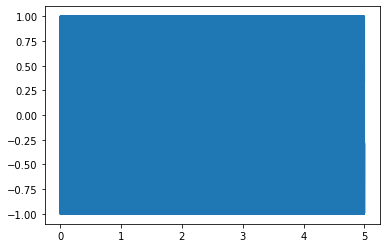

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # in Hertz
DURATION = 5  # in Seconds

# Gerar uma onda senoidal em 2 hertz por 5 segundos
# Neste caso, não há o que ser ouvido no audio, teste com 2000
x, y = generate_sine_wave(2000, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [ ]:
import IPython
IPython.display.Audio(y, rate=SAMPLE_RATE)

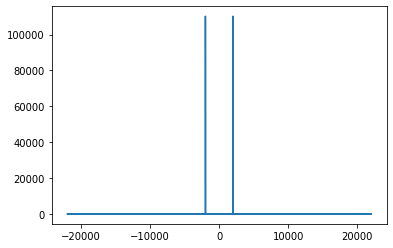

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(y)
xf = fftfreq(N, d=1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

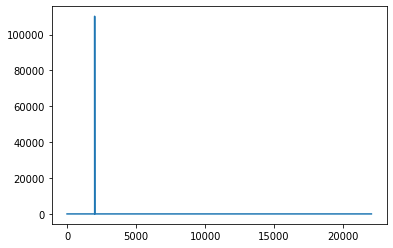

In [ ]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(y)
xf = rfftfreq(N, d=1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
import os
import librosa
import IPython

if not os.path.exists('audio_example_1.wav'):
  !wget https://github.com/natmourajr/data/raw/main/audio_example_1.wav

samples , sampling_rate = librosa.load("audio_example_1.wav")
print("Sampling rate is %i Hz"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio("audio_example_1.wav")

In [ ]:
print(samples)

[-9.1552734e-05 -3.0517578e-05  0.0000000e+00 ... -2.9602051e-03
 -2.8991699e-03 -3.8757324e-03]


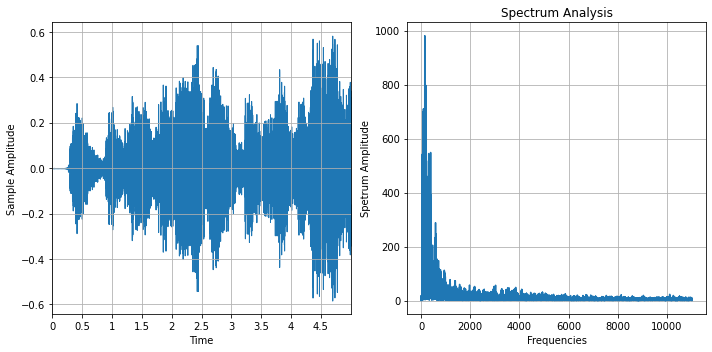

In [ ]:
from copy import copy, deepcopy
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np

# vamos pegar 5 segundos de sinal
samples_for_time_period = 5*sampling_rate
#print(samples_for_time_period)

working_samples = deepcopy(samples)
ancora = 0
working_samples = working_samples[ancora:ancora+samples_for_time_period]

import librosa.display

fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(10,5))  

librosa.display.waveplot(working_samples, sr=sampling_rate,ax=axs[0])
axs[0].grid()
axs[0].set_ylabel('Sample Amplitude')

yf = rfft(working_samples)
xf = rfftfreq(samples_for_time_period, d=1/sampling_rate)

axs[1].plot(xf, np.abs(yf))
axs[1].grid()
axs[1].set_title('Spectrum Analysis')
axs[1].set_xlabel('Frequencies')
axs[1].set_ylabel('Spetrum Amplitude');
plt.tight_layout()

### Filtragem "digital" de sinais

In [ ]:
condicao_1 = xf > 300
condicao_2 = xf <= 4000
condicao_final = np.logical_and(condicao_1, condicao_2)

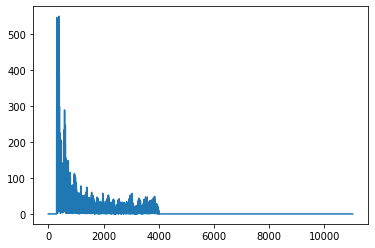

In [ ]:
yf[np.logical_not(condicao_final)] = 0

plt.plot(xf, np.abs(yf))
plt.show()

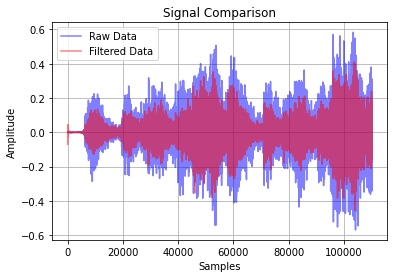

In [ ]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(working_samples, 'b', label='Raw Data', alpha=0.5)
plt.plot(new_sig, 'r', label='Filtered Data', alpha=0.5)
plt.grid()
plt.legend(loc='best')

plt.title('Signal Comparison')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
import IPython
IPython.display.Audio(working_samples, rate=sampling_rate)

In [ ]:
import IPython
IPython.display.Audio(new_sig, rate=sampling_rate)

## Exercícios



1.   Abertura, análise de distribuição

  1.   Abra o aquivo de áudio que encontra no link: https://github.com/natmourajr/data/raw/main/audio_example_2.wav
  2.   Quantas amostras o mesmo contém?
  3.   Qual a sua taxa de amostragem?
  4.   Qual a sua duração em segundos?
  5.   Plote a distribuição dos valores de amostra com 25 bins de resolução
  6.   Avalie - descreveria a distribuição, depois mostraria alguns pontos de interesse (média, variância para o caso de uma gaussiana, ou moda para o caso de uma distribuição outra)


2.   Abertura, corte e análise
  1.   Abra o mesmo arquivo de áudio utilizado item anterior
  2.   Faça uma seleção de dois períodos de 1 segundo de sinal em duas posições distintas do arquivo
  3.   Faça a distribuição das amostras de cada um dos períodos em um único plot (lembre-se que os bins devem ter os mesmos valores para ambas as distribuições para que possamos comparar)
  4.   Avalie este resultado
  5.   Faça a DTFT dos períodos selecionados e compare
  6.   O que mudou? Por que mudou? Como explicar isso?





Solução da parte 1

In [ ]:
import os
import librosa
import IPython

if not os.path.exists('audio_example_2.wav'):
  !wget https://github.com/natmourajr/data/raw/main/audio_example_2.wav

samples , sampling_rate = librosa.load("audio_example_2.wav")
print("Sampling rate is %i Hz"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio("audio_example_2.wav")

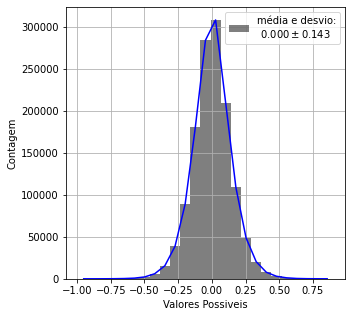

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# levantamento da distribuição das amostras de audio

fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(5,5)) 

[n, bins, patches] = axs.hist(samples, bins=25, 
                              color='black', alpha=0.5, 
                              label='média e desvio:\n $%1.3f \pm %1.3f$'%
                              (samples.mean(), samples.std()));
axs.grid()
axs.set_xlabel("Valores Possiveis");
axs.set_ylabel("Contagem");
axs.legend(loc='best');

bin_centers = np.zeros(len(bins)-1)

for ibins in range(0,len(bins)-1):
  bin_centers[ibins] = bins[ibins]+(bins[ibins+1]-bins[ibins])/2

axs.plot(bin_centers, n,'-',color='blue')

Solução da parte 2

In [ ]:
import os
import librosa
import IPython

if not os.path.exists('audio_example_2.wav'):
  !wget https://github.com/natmourajr/data/raw/main/audio_example_2.wav

samples , sampling_rate = librosa.load("audio_example_2.wav")
print("Sampling rate is %i Hz"%(sampling_rate))
print("Number of Samples in this file is %i"%(samples.shape[0]))
print("Record time is %1.3f seconds"%(float(samples.shape[0]/sampling_rate)))

IPython.display.Audio("audio_example_2.wav")

Fazer o corte de um segundo de sinal

Samples in one second:  22050
Size of the first signal:  22050
Size of the second signal:  22050


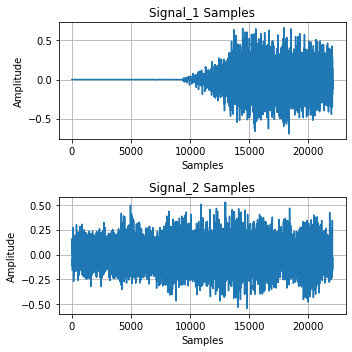

In [ ]:
from copy import copy, deepcopy


signal_1 = deepcopy(samples)
signal_2 = deepcopy(samples)

fig, axs = plt.subplots(nrows = 2, ncols=1, figsize=(5,5)) 

# cortar o primeiro segundo o sinal
# quantas amostras eu tenho em um segundo?
print('Samples in one second: ',sampling_rate)
pos1 = 0
delta_t = 1 # in seconds
signal_1 = signal_1[pos1:pos1+int(delta_t*sampling_rate)]
print('Size of the first signal: ',signal_1.shape[0])

n = np.arange(0,int(delta_t*sampling_rate))
axs[0].plot(n, signal_1)
axs[0].set_title('Signal_1 Samples')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].grid()

# cortar um segundo depois de passados 10s de sinal
pos2 = 10*sampling_rate
signal_2 = signal_2[pos2:pos2+int(delta_t*sampling_rate)]
print('Size of the second signal: ',signal_2.shape[0])

axs[1].plot(n,signal_2)
axs[1].set_title('Signal_2 Samples')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
plt.tight_layout()

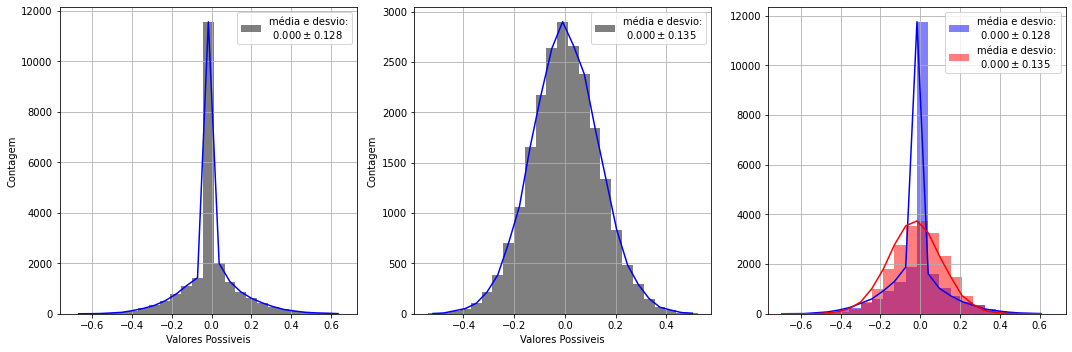

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# levantamento da distribuição das amostras de audio
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(15,5)) 


[n, bins, patches] = axs[0].hist(signal_1, bins=25, 
                              color='black', alpha=0.5, 
                              label='média e desvio:\n $%1.3f \pm %1.3f$'%
                              (signal_1.mean(), signal_1.std()));
axs[0].grid()
axs[0].set_xlabel("Valores Possiveis");
axs[0].set_ylabel("Contagem");
axs[0].legend(loc='best');

bin_centers = np.zeros(len(bins)-1)

for ibins in range(0,len(bins)-1):
  bin_centers[ibins] = bins[ibins]+(bins[ibins+1]-bins[ibins])/2

axs[0].plot(bin_centers, n,'-',color='blue')

[n, bins, patches] = axs[1].hist(signal_2, bins=25, 
                              color='black', alpha=0.5, 
                              label='média e desvio:\n $%1.3f \pm %1.3f$'%
                              (signal_2.mean(), signal_2.std()));
axs[1].grid()
axs[1].set_xlabel("Valores Possiveis");
axs[1].set_ylabel("Contagem");
axs[1].legend(loc='best');

bin_centers = np.zeros(len(bins)-1)

for ibins in range(0,len(bins)-1):
  bin_centers[ibins] = bins[ibins]+(bins[ibins+1]-bins[ibins])/2

axs[1].plot(bin_centers, n,'-',color='blue')


# como as faixas dinamicas dos sinais são diferentes, 
# precisamos travar os pontos de análise
max_max = np.max([signal_1.max(), signal_2.max()])
min_min = np.min([signal_1.min(), signal_2.min()])
bins = np.linspace(min_min, max_max, 25)

[n, bins, patches] = axs[2].hist(signal_1, bins=bins, 
                              color='blue', alpha=0.5, 
                              label='média e desvio:\n $%1.3f \pm %1.3f$'%
                              (signal_1.mean(), signal_1.std()));
axs[2].plot(bins[:-1],n,'-',color='blue')

[n, bins, patches] = axs[2].hist(signal_2, bins=bins, 
                              color='red', alpha=0.5, 
                              label='média e desvio:\n $%1.3f \pm %1.3f$'%
                              (signal_2.mean(), signal_2.std()));
axs[2].plot(bins[:-1],n,'-',color='red')

axs[2].legend(loc='best')
axs[2].grid()
plt.tight_layout()

Fazer a DTFT

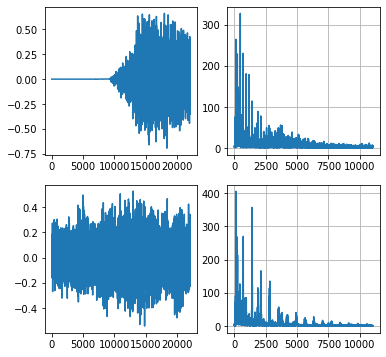

In [ ]:
from copy import copy, deepcopy
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(6,6))  

n = np.arange(0,len(signal_1))
axs[0,0].plot(n, signal_1)

yf = rfft(signal_1)
xf = rfftfreq(len(signal_1), d=1/sampling_rate)

axs[0,1].plot(xf, np.abs(yf))
axs[0,1].grid()
# axs[1].set_title('Spectrum Analysis')
# axs[1].set_xlabel('Frequencies')
# axs[1].set_ylabel('Spetrum Amplitude');
# plt.tight_layout()

axs[1,0].plot(n, signal_2)

yf = rfft(signal_2)
xf = rfftfreq(len(signal_2), d=1/sampling_rate)

axs[1,1].plot(xf, np.abs(yf))
axs[1,1].grid()


In [ ]:
import IPython
IPython.display.Audio(signal_1, rate=sampling_rate)

In [ ]:
import IPython
IPython.display.Audio(signal_2, rate=sampling_rate)

Dúvidas

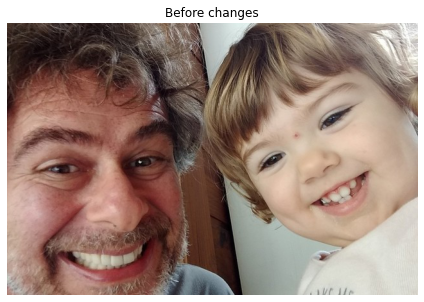

In [ ]:
import os
import imageio # biblioteca de leitura de imagens em python 
from matplotlib import pyplot as plt
import IPython

if not os.path.exists('joao-clara-abre_b6lvhr4.jpg'):
  !wget https://s2.glbimg.com/26Ht9skdEXCxHbP5EHyKba6ZLg4=/640x424/top/i.glbimg.com/og/ig/infoglobo/f/original/2021/12/01/joao-clara-abre_b6lvhr4.jpg

fig, axs = plt.subplots(1,1, figsize=(10,5))
pic = imageio.imread('joao-clara-abre_b6lvhr4.jpg')
axs.imshow(pic)
axs.set_title("Before changes")
axs.axis('off')
plt.show()